In [9]:
import numpy as np
import pandas as pd
from math import log2
import plotly.plotly as py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles
import scipy.stats as ss

### Read data file

In [10]:
def read_file(filename):
    data = pd.read_table(filename)
    data = data[['gene_id','gene_CIR_read_count','gene_CER_read_count',
                           'gene_CIR_RPKM','gene_CER_RPKM','gene_IRI']]
    data = data.sort_values('gene_CIR_RPKM',ascending= False).set_index('gene_id').replace([np.inf, -np.inf], np.nan).dropna()
    data = data[data.gene_IRI != 0]
    data = pd.DataFrame(data)
    return (data)
     
L140_sorted = read_file('L140_sorted.quant.IRI.genes.csv')
L149_sorted = read_file('L149_sorted.quant.IRI.genes.csv')
L062_sorted = read_file('L062_sorted.quant.IRI.genes.csv')
N048_sorted = read_file('N048_sorted.quant.IRI.genes.csv')
N068_sorted = read_file('N068_sorted.quant.IRI.genes.csv')
N090_sorted = read_file('N090_sorted.quant.IRI.genes.csv')
N098_sorted = read_file('N098_sorted.quant.IRI.genes.csv')
L005_sorted = read_file('L005_sorted.quant.IRI.genes.csv')
L027_sorted = read_file('L027_sorted.quant.IRI.genes.csv')
L031_sorted = read_file('L031_sorted.quant.IRI.genes.csv')
L072_sorted = read_file('L072_sorted.quant.IRI.genes.csv')
L074_sorted = read_file('L074_sorted.quant.IRI.genes.csv')
L078_sorted = read_file('L078_sorted.quant.IRI.genes.csv')
L102_sorted = read_file('L102_sorted.quant.IRI.genes.csv')
L115_sorted = read_file('L115_sorted.quant.IRI.genes.csv')
L133_sorted = read_file('L133_sorted.quant.IRI.genes.csv')
L137_sorted = read_file('L137_sorted.quant.IRI.genes.csv')

In [11]:
L140_sorted.shape

(13347, 5)

## Histogram

#### IRI histogram

In [ ]:
l062_iri = np.log2(L062_sorted['gene_IRI'].values)
l140_iri = np.log2(L140_sorted['gene_IRI'].values)
l149_iri = np.log2(L149_sorted['gene_IRI'].values)

n048_iri = np.log2(N048_sorted['gene_IRI'].values)
n068_iri = np.log2(N068_sorted['gene_IRI'].values)
n090_iri = np.log2(N090_sorted['gene_IRI'].values)
n098_iri = np.log2(N098_sorted['gene_IRI'].values)

l072_iri = np.log2(L062_sorted['gene_IRI'].values)
l137_iri = np.log2(L137_sorted['gene_IRI'].values)

l074_iri = np.log2(L074_sorted['gene_IRI'].values)
l078_iri = np.log2(L078_sorted['gene_IRI'].values)
l005_iri = np.log2(L005_sorted['gene_IRI'].values)
l031_iri = np.log2(L031_sorted['gene_IRI'].values)
l133_iri = np.log2(L133_sorted['gene_IRI'].values)
l027_iri = np.log2(L027_sorted['gene_IRI'].values)
l102_iri = np.log2(L102_sorted['gene_IRI'].values)
l115_iri = np.log2(L115_sorted['gene_IRI'].values)

In [ ]:
data_iri = [l062_iri, l140_iri, l149_iri, n048_iri, n068_iri, n090_iri, n098_iri,
       l072_iri, l137_iri, l074_iri, l078_iri, l005_iri, l031_iri, l133_iri, 
       l027_iri, l102_iri, l115_iri]
data_name = ['L062', 'L140', 'L149', 'N048', 'N068', 'N090', 'N098', 'L072','L137',
            'L074',  'L078', 'L005', 'L031', 'L133', 'L027', 'L102', 'L115']
colors = ['g','g','g','r','r','r','r','y','y','b','b','b','b','b','b','b','b']

num_bin = 100
alpha_trans = 0.5
xmin = -15
xmax = 5

plt.figure()
plt.title('IRI Distribution')
for i in range(17):
    plt.subplot(17, 1, i+1)
    plt.hist(data_iri[i], num_bin, range=[xmin, xmax], alpha = alpha_trans, 
             label = data_name[i], facecolor=colors[i])
    plt.plot([-5.0,-4.99],[-100, 500], '-r' )
    plt.legend()
    plt.ylim(0,500)
    
plt.xlabel('Log2(IRI)',fontsize = 14)

plt.subplots_adjust(top = 3.2, bottom = 0.8, left = 0.1, right = 0.8)
plt.savefig("IRI_Distribution_All.png", bbox_inches='tight', dpi=400)
plt.show()    

#### CIR_RPKM histogram

In [ ]:
l062_ir = np.log2(L062_sorted['gene_CIR_RPKM'].values)
l140_ir = np.log2(L140_sorted['gene_CIR_RPKM'].values)
l149_ir = np.log2(L149_sorted['gene_CIR_RPKM'].values)

n048_ir = np.log2(N048_sorted['gene_CIR_RPKM'].values)
n068_ir = np.log2(N068_sorted['gene_CIR_RPKM'].values)
n090_ir = np.log2(N090_sorted['gene_CIR_RPKM'].values)
n098_ir = np.log2(N098_sorted['gene_CIR_RPKM'].values)

l072_ir = np.log2(L062_sorted['gene_CIR_RPKM'].values)
l137_ir = np.log2(L137_sorted['gene_CIR_RPKM'].values)

l074_ir = np.log2(L074_sorted['gene_CIR_RPKM'].values)
l078_ir = np.log2(L078_sorted['gene_CIR_RPKM'].values)
l005_ir = np.log2(L005_sorted['gene_CIR_RPKM'].values)
l031_ir = np.log2(L031_sorted['gene_CIR_RPKM'].values)
l133_ir = np.log2(L133_sorted['gene_CIR_RPKM'].values)
l027_ir = np.log2(L027_sorted['gene_CIR_RPKM'].values)
l102_ir = np.log2(L102_sorted['gene_CIR_RPKM'].values)
l115_ir = np.log2(L115_sorted['gene_CIR_RPKM'].values)

In [ ]:
data_ir = [l062_ir, l140_ir, l149_ir, n048_ir, n068_ir, n090_ir, n098_ir, l072_ir,
           l137_ir, l027_ir, l133_ir, l074_ir, l005_ir, l102_ir, l078_ir, l115_ir, l031_ir]
data_name = ['L062', 'L140', 'L149', 'N048', 'N068', 'N090', 'N098', 'L072','L137',
             'L027','L133','L074','L005', 'L102', 'L078', 'L115', 'L031']
colors = ['g','g','g','r','r','r','r','y','y','b','b','b','b','b','b','b','b']

num_bin = 100
alpha_trans = 0.5
xmin = -15
xmax = 5

plt.figure()
plt.title('ir Distribution')
for i in range(17):
    plt.subplot(17, 1, i+1)
    plt.hist(data_ir[i], num_bin, range=[xmin, xmax], alpha = alpha_trans,
             label = data_name[i], facecolor=colors[i])
    plt.plot([-5.0,-4.99],[-100, 500], '-r' )
    plt.legend()
    plt.ylim(0,500)
    
plt.xlabel('Log2(CIR_RPKM)',fontsize = 14)

plt.subplots_adjust(top = 3.2, bottom = 0.8, left = 0.1, right = 0.8)
plt.savefig("CIR_RPKM_Distribution_All.png", bbox_inches='tight', dpi=400)
plt.show()    

## Overlap  //  IR(CIR_RPKM)

In [12]:
# get top list of different samples
def top_list(data,i):
        return(data.index.tolist()[:i])
    
def multi_top_list(datasets,i):
    
    lists = []
    for a in datasets:
        lists.append(top_list(a, i))
    return (lists)

# get the overlap of top lists from different samples
def get_overlap(lists):
        ls=[set(l) for l in lists]
        fst=ls[0]
        for l in ls[1:]:
            fst.intersection_update(l)
        return (len(fst), fst)
    
#Let diagram show
def make_ticklabels_invisible(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, '', va="center", ha="center")
        for tl in ax.get_xticklabels() + ax.get_yticklabels():
            tl.set_visible(False)

#### Top 100 : L062/L140/L149 |  N048/N068/N090/N098 | L137/L072

In [13]:
L062_IR_100 = multi_top_list([L140_sorted,L062_sorted,L149_sorted],100)
L062_IR_100_overlap = get_overlap(L062_IR_100)[0]
print ('3L Top 100 IR oevrlap: ',L062_IR_100_overlap)

N048_IR_100 = multi_top_list([N048_sorted,N068_sorted,N090_sorted,N098_sorted],100)
N048_IR_100_overlap = get_overlap(N048_IR_100)[0]
print ('4N Top 100 IR oevrlap: ',N048_IR_100_overlap)

L072_IR_100 = multi_top_list([L072_sorted,L137_sorted],100)
L072_IR_100_overlap = get_overlap(L072_IR_100)[0]
print ('L072/L137 Top 100 IR oevrlap: ',L072_IR_100_overlap)

NL_IR_100 = multi_top_list([L140_sorted,L062_sorted,L149_sorted,
                              N048_sorted,N068_sorted,N090_sorted,N098_sorted],100)
NL_IR_100_overlap = get_overlap(NL_IR_100)[0]
print ('3L/4N Top 100 IR oevrlap: ',NL_IR_100_overlap)

LL_IR_100 = multi_top_list([L140_sorted,L062_sorted,L149_sorted,
                              L072_sorted,L137_sorted],100)
LL_IR_100_overlap = get_overlap(LL_IR_100)[0]
print ('2L/3L Top 100 IR oevrlap: ',LL_IR_100_overlap)

L072_N_IR_100 = multi_top_list([L072_sorted,L137_sorted,
                              N048_sorted,N068_sorted,N090_sorted,N098_sorted],100)
L072_N_IR_100_overlap = get_overlap(L072_N_IR_100)[0]
print ('2L/4N Top 100 IR oevrlap: ',L072_N_IR_100_overlap)

3L Top 100 IR oevrlap:  71
4N Top 100 IR oevrlap:  57
L072/L137 Top 100 IR oevrlap:  85
3L/4N Top 100 IR oevrlap:  46
2L/3L Top 100 IR oevrlap:  49
2L/4N Top 100 IR oevrlap:  51


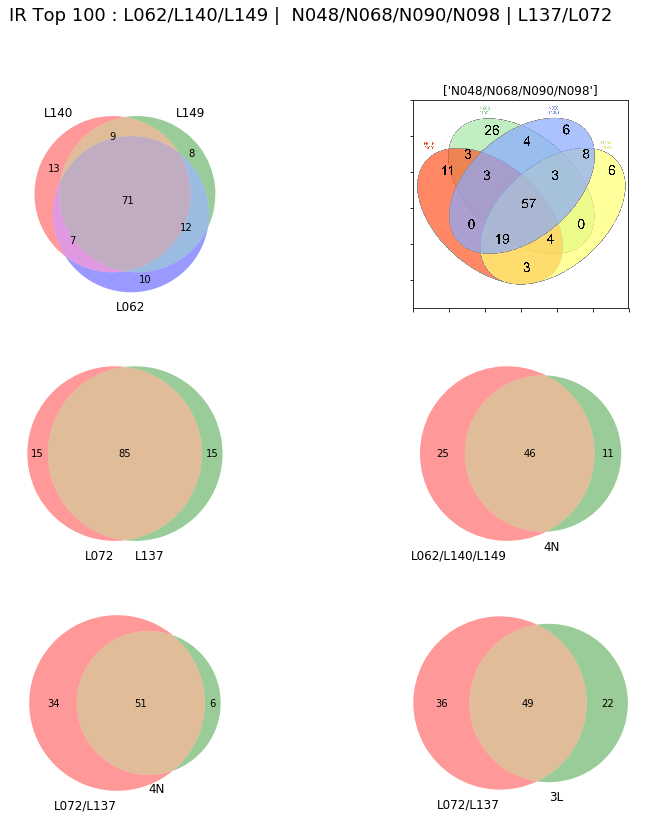

In [15]:
plt.figure(figsize=(13,13))

gs = GridSpec(3, 2)
ax1 = plt.subplot(gs[0,0])
venn3([set(top_list(L140_sorted,100)), set(top_list(L149_sorted,100)), set(top_list(L062_sorted,100))], 
      set_labels = ('L140', 'L149', 'L062'), ax=ax1)

ax2 = plt.subplot(gs[0,1])
img = mpimg.imread('IR_100_4N.png')
plt.imshow(img)
plt.title(['N048/N068/N090/N098'])


ax3 = plt.subplot(gs[1,0])
venn2([set(top_list(L072_sorted,100)), set(top_list(L137_sorted,100))], 
      set_labels = ('L072', 'L137'), ax=ax3)

ax4 = plt.subplot(gs[1,1])
venn2(subsets = (25, 11, 46), set_labels = ('L062/L140/L149', '4N'), ax=ax4)

ax5 = plt.subplot(gs[2,0])
venn2(subsets = (34, 6, 51), set_labels = ('L072/L137', '4N'), ax=ax5)

ax6 = plt.subplot(gs[2,1])
venn2(subsets = (36, 22, 49), set_labels = ('L072/L137', '3L'), ax=ax6)

plt.suptitle("IR Top 100 : L062/L140/L149 |  N048/N068/N090/N098 | L137/L072",size = 18)
make_ticklabels_invisible(plt.gcf())


plt.show()



#### martix of list_IR_100

In [16]:
L062_IR_100_overlap_list = get_overlap(L062_IR_100)[1]
N048_IR_100_overlap_list = get_overlap(N048_IR_100)[1]
L072_IR_100_overlap_list = get_overlap(L072_IR_100)[1]
list_IR_100 = set(list(L062_IR_100_overlap_list) + list(N048_IR_100_overlap_list) + list(L072_IR_100_overlap_list))
list_IR_100 = list(list_IR_100)
len(list_IR_100)
#list_IR_100[0]

107

In [17]:
L140_sorted.head(5)

,gene_CIR_read_count,gene_CER_read_count,gene_CIR_RPKM,gene_CER_RPKM,gene_IRI
gene_id,,,,,
ZFP36L2,4862.118698,152738.881302,124.690388,543.059830,0.229607
EIF1,13468.703173,64188.296827,122.302369,635.608519,0.192418
HLA-A,13609.761992,169294.238008,99.058416,1379.825027,0.071791
TSC22D3,11050.027742,93949.972258,95.896294,780.758913,0.122824
HLA-B,12030.400552,242792.599448,89.295513,2027.964202,0.044032


In [18]:
L140_IR_100 = L140_sorted.loc[L140_sorted.index  == 'RPS13']
for i in list_IR_100:
    a = L140_sorted.loc[L140_sorted.index  == i]
    L140_IR_100 = L140_IR_100.append(a)
L140_IR_100 = L140_IR_100.drop_duplicates(['gene_CER_RPKM'])
L140_IR_100 = L140_IR_100[['gene_CIR_RPKM']]
L140_IR_100.columns = ['L140_IR']
L140_IR_100.to_csv('1.csv')
L140_IR_100.shape

L149_IR_100 = L149_sorted.loc[L149_sorted.index  == 'RPS13']
for i in list_IR_100:
    a = L149_sorted.loc[L149_sorted.index  == i]
    L149_IR_100 = L149_IR_100.append(a)
L149_IR_100 = L149_IR_100.drop_duplicates(['gene_CER_RPKM'])
L149_IR_100 = L149_IR_100[['gene_CIR_RPKM']]
L149_IR_100.columns = ['L149_IR']
L149_IR_100.to_csv('2.csv')
L149_IR_100.shape

L062_IR_100 = L062_sorted.loc[L062_sorted.index  == 'RPS13']
for i in list_IR_100:
    a = L062_sorted.loc[L062_sorted.index  == i]
    L062_IR_100 = L062_IR_100.append(a)
L062_IR_100 = L062_IR_100.drop_duplicates(['gene_CER_RPKM'])
L062_IR_100 = L062_IR_100[['gene_CIR_RPKM']]
L062_IR_100.columns = ['L062_IR']
L062_IR_100.to_csv('3.csv')
L062_IR_100.shape

N048_IR_100 = N048_sorted.loc[N048_sorted.index  == 'RPS13']
for i in list_IR_100:
    a = N048_sorted.loc[N048_sorted.index  == i]
    N048_IR_100 = N048_IR_100.append(a)
N048_IR_100 = N048_IR_100.drop_duplicates(['gene_CER_RPKM'])
N048_IR_100 = N048_IR_100[['gene_CIR_RPKM']]
N048_IR_100.columns = ['N048_IR']
N048_IR_100.to_csv('4.csv')
N048_IR_100.shape

N068_IR_100 = N068_sorted.loc[N068_sorted.index  == 'RPS13']
for i in list_IR_100:
    a = N068_sorted.loc[N068_sorted.index  == i]
    N068_IR_100 = N068_IR_100.append(a)
N068_IR_100 = N068_IR_100.drop_duplicates(['gene_CER_RPKM'])
N068_IR_100 = N068_IR_100[['gene_CIR_RPKM']]
N068_IR_100.columns = ['N068_IR']
N068_IR_100.to_csv('5.csv')
N068_IR_100.shape

N090_IR_100 = N090_sorted.loc[N090_sorted.index  == 'RPS13']
for i in list_IR_100:
    a = N090_sorted.loc[N090_sorted.index  == i]
    N090_IR_100 = N090_IR_100.append(a)
N090_IR_100 = N090_IR_100.drop_duplicates(['gene_CER_RPKM'])
N090_IR_100 = N090_IR_100[['gene_CIR_RPKM']]
N090_IR_100.columns = ['N090_IR']
N090_IR_100.to_csv('6.csv')
N090_IR_100.shape

N098_IR_100 = N098_sorted.loc[N098_sorted.index  == 'RPS13']
for i in list_IR_100:
    a = N098_sorted.loc[N098_sorted.index  == i]
    N098_IR_100 = N098_IR_100.append(a)
N098_IR_100 = N098_IR_100.drop_duplicates(['gene_CER_RPKM'])
N098_IR_100 = N098_IR_100[['gene_CIR_RPKM']]
N098_IR_100.columns = ['N098_IR']
N098_IR_100.to_csv('7.csv')
N098_IR_100.shape

L072_IR_100 = L072_sorted.loc[L072_sorted.index  == 'RPS13']
for i in list_IR_100:
    a = L072_sorted.loc[L072_sorted.index  == i]
    L072_IR_100 = L072_IR_100.append(a)
L072_IR_100 = L072_IR_100.drop_duplicates(['gene_CER_RPKM'])
L072_IR_100 = L072_IR_100[['gene_CIR_RPKM']]
L072_IR_100.columns = ['L072_IR']
L072_IR_100.to_csv('8.csv')
L072_IR_100.shape

L137_IR_100 = L137_sorted.loc[L137_sorted.index  == 'RPS13']
for i in list_IR_100:
    a = L137_sorted.loc[L137_sorted.index  == i]
    L137_IR_100 = L137_IR_100.append(a)
L137_IR_100 = L137_IR_100.drop_duplicates(['gene_CER_RPKM'])
L137_IR_100 = L137_IR_100[['gene_CIR_RPKM']]
L137_IR_100.columns = ['L137_IR']
L137_IR_100.to_csv('9.csv')
L137_IR_100.shape

L074_IR_100 = L074_sorted.loc[L074_sorted.index  == 'RPS13']
for i in list_IR_100:
    a = L074_sorted.loc[L074_sorted.index  == i]
    L074_IR_100 = L074_IR_100.append(a)
L074_IR_100 = L074_IR_100.drop_duplicates(['gene_CER_RPKM'])
L074_IR_100 = L074_IR_100[['gene_CIR_RPKM']]
L074_IR_100.columns = ['L074_IR']
L074_IR_100.to_csv('10.csv')
L074_IR_100.shape

L115_IR_100 = L115_sorted.loc[L115_sorted.index  == 'RPS13']
for i in list_IR_100:
    a = L115_sorted.loc[L115_sorted.index  == i]
    L115_IR_100 = L115_IR_100.append(a)
L115_IR_100 = L115_IR_100.drop_duplicates(['gene_CER_RPKM'])
L115_IR_100 = L115_IR_100[['gene_CIR_RPKM']]
L115_IR_100.columns = ['L115_IR']
L115_IR_100.to_csv('11.csv')
L115_IR_100.shape

L133_IR_100 = L133_sorted.loc[L133_sorted.index  == 'RPS13']
for i in list_IR_100:
    a = L133_sorted.loc[L133_sorted.index  == i]
    L133_IR_100 = L133_IR_100.append(a)
L133_IR_100 = L133_IR_100.drop_duplicates(['gene_CER_RPKM'])
L133_IR_100 = L133_IR_100[['gene_CIR_RPKM']]
L133_IR_100.columns = ['L133_IR']
L133_IR_100.to_csv('12.csv')
L133_IR_100.shape

L005_IR_100 = L005_sorted.loc[L005_sorted.index  == 'RPS13']
for i in list_IR_100:
    a = L005_sorted.loc[L005_sorted.index  == i]
    L005_IR_100 = L005_IR_100.append(a)
L005_IR_100 = L005_IR_100.drop_duplicates(['gene_CER_RPKM'])
L005_IR_100 = L005_IR_100[['gene_CIR_RPKM']]
L005_IR_100.columns = ['L005_IR']
L005_IR_100.to_csv('13.csv')
L005_IR_100.shape

L027_IR_100 = L027_sorted.loc[L027_sorted.index  == 'RPS13']
for i in list_IR_100:
    a = L027_sorted.loc[L027_sorted.index  == i]
    L027_IR_100 = L027_IR_100.append(a)
L027_IR_100 = L027_IR_100.drop_duplicates(['gene_CER_RPKM'])
L027_IR_100 = L027_IR_100[['gene_CIR_RPKM']]
L027_IR_100.columns = ['L027_IR']
L027_IR_100.to_csv('14.csv')
L027_IR_100.shape

L031_IR_100 = L031_sorted.loc[L031_sorted.index  == 'RPS13']
for i in list_IR_100:
    a = L031_sorted.loc[L031_sorted.index  == i]
    L031_IR_100 = L031_IR_100.append(a)
L031_IR_100 = L031_IR_100.drop_duplicates(['gene_CER_RPKM'])
L031_IR_100 = L031_IR_100[['gene_CIR_RPKM']]
L031_IR_100.columns = ['L031_IR']
L031_IR_100.to_csv('15.csv')
L031_IR_100.shape

L078_IR_100 = L078_sorted.loc[L078_sorted.index  == 'RPS13']
for i in list_IR_100:
    a = L078_sorted.loc[L078_sorted.index  == i]
    L078_IR_100 = L078_IR_100.append(a)
L078_IR_100 = L078_IR_100.drop_duplicates(['gene_CER_RPKM'])
L078_IR_100 = L078_IR_100[['gene_CIR_RPKM']]
L078_IR_100.columns = ['L078_IR']
L078_IR_100.to_csv('16.csv')
L078_IR_100.shape

L102_IR_100 = L102_sorted.loc[L102_sorted.index  == 'RPS13']
for i in list_IR_100:
    a = L102_sorted.loc[L102_sorted.index  == i]
    L102_IR_100 = L102_IR_100.append(a)
L102_IR_100 = L102_IR_100.drop_duplicates(['gene_CER_RPKM'])
L102_IR_100 = L102_IR_100[['gene_CIR_RPKM']]
L102_IR_100.columns = ['L102_IR']
L102_IR_100.to_csv('17.csv')
L102_IR_100.shape

(107, 1)

#### Top 200 : L062/L140/L149 |  N048/N068/N090/N098 | L137/L072

In [ ]:
L062_IR_200 = multi_top_list([L140_sorted,L062_sorted,L149_sorted],200)
L062_IR_200_overlap = get_overlap(L062_IR_200)[0]
print ('3L Top 200 IR oevrlap: ',L062_IR_200_overlap)

#-------

N048_IR_200 = multi_top_list([N048_sorted,N068_sorted,N090_sorted,N098_sorted],200)
N048_IR_200_overlap = get_overlap(N048_IR_200)[0]
print ('4N Top 200 IR oevrlap: ',N048_IR_200_overlap)

#-------

L072_IR_200 = multi_top_list([L072_sorted,L137_sorted],200)
L072_IR_200_overlap = get_overlap(L072_IR_200)[0]
print ('L072/L137 Top 200 IR oevrlap: ',L072_IR_200_overlap)

#-------

L074_IR_200 = multi_top_list([L074_sorted,L133_sorted,L115_sorted],200)
L074_IR_200_overlap = get_overlap(L074_IR_200)[0]
print ('L074/L133/L115 Top 200 IR oevrlap: ',L074_IR_200_overlap)
print ('#-------------------------------------#')

#-----------------------------------------------------------------------------------------

NL_IR_200 = multi_top_list([L140_sorted,L062_sorted,L149_sorted,
                              N048_sorted,N068_sorted,N090_sorted,N098_sorted],200)
NL_IR_200_overlap = get_overlap(NL_IR_200)[0]
print ('3L/4N Top 200 IR oevrlap: ',NL_IR_200_overlap)

#-------

LL_IR_200 = multi_top_list([L140_sorted,L062_sorted,L149_sorted,
                              L072_sorted,L137_sorted],200)
LL_IR_200_overlap = get_overlap(LL_IR_200)[0]
print ('3L/2L Top 200 IR oevrlap: ',LL_IR_200_overlap)

#-------

LL_IR_200 = multi_top_list([L140_sorted,L062_sorted,L149_sorted,
                              L074_sorted,L133_sorted,L115_sorted],200)
LL_IR_200_overlap = get_overlap(LL_IR_200)[0]
print ('3L/3LL Top 200 IR oevrlap: ',LL_IR_200_overlap)

#-------

L072_N_IR_200 = multi_top_list([L072_sorted,L137_sorted,
                              N048_sorted,N068_sorted,N090_sorted,N098_sorted],200)
L072_N_IR_200_overlap = get_overlap(L072_N_IR_200)[0]
print ('4N/2L Top 200 IR oevrlap: ',L072_N_IR_200_overlap)

#-------

L072_N_IR_200 = multi_top_list([L074_sorted,L133_sorted,L115_sorted,
                              N048_sorted,N068_sorted,N090_sorted,N098_sorted],200)
L072_N_IR_200_overlap = get_overlap(L072_N_IR_200)[0]
print ('4N/3LL Top 200 IR oevrlap: ',L072_N_IR_200_overlap)

#-------

LL_IR_200 = multi_top_list([L072_sorted,L137_sorted,
                           L074_sorted,L133_sorted,L115_sorted],200)
LL_IR_200_overlap = get_overlap(LL_IR_200)[0]
print ('2L/3LL Top 200 IR oevrlap: ',LL_IR_200_overlap)



In [ ]:
plt.figure(figsize=(13,13))

gs = GridSpec(2, 2)
ax1 = plt.subplot(gs[0,0])
venn3([set(top_list(L140_sorted,200)), set(top_list(L149_sorted,200)), set(top_list(L062_sorted,200))], 
      set_labels = ('L140', 'L149', 'L062'), ax=ax1)

ax2 = plt.subplot(gs[0,1])
img = mpimg.imread('IR_200_4N.png')
plt.imshow(img)
plt.title(['N048/N068/N090/N098'])


ax3 = plt.subplot(gs[1,0])
venn2([set(top_list(L072_sorted,200)), set(top_list(L137_sorted,200))], 
      set_labels = ('L072', 'L137'), ax=ax3)

ax4 = plt.subplot(gs[1,1])
venn3([set(top_list(L074_sorted,200)), set(top_list(L133_sorted,200)), set(top_list(L115_sorted,200))], 
      set_labels = ('L074', 'L133', 'L115'), ax=ax4)

plt.suptitle("IR Top 200 overlap : L062/L140/L149 |  N048/N068/N090/N098 | L137/L072 | L074/L133/L115", size = 18)
make_ticklabels_invisible(plt.gcf())

plt.show()

In [ ]:
plt.figure(figsize=(13,13))

gs = GridSpec(3, 2)

ax1 = plt.subplot(gs[0,0])
venn2(subsets = (41, 18, 104), set_labels = ('3L', '4N'), ax=ax1)

ax2 = plt.subplot(gs[0,1])
venn2(subsets = (33, 56, 112), set_labels = ('3L', 'L072/L137'), ax=ax2)

ax3 = plt.subplot(gs[1,0])
venn2(subsets = (61, 61, 84), set_labels = ('3L', 'L074/L133/L115'), ax=ax3)

ax4 = plt.subplot(gs[1,1])
venn2(subsets = (11, 57, 111), set_labels = ('4N', 'L072/L137'), ax=ax4)

ax5 = plt.subplot(gs[2,0])
venn2(subsets = (32, 65, 90), set_labels = ('4N', 'L074/L133/L115'), ax=ax5)

ax6 = plt.subplot(gs[2,1])
venn2(subsets = (49, 26, 119), set_labels = ('L072/L137', 'L074/L133/L115'), ax=ax6)

plt.suptitle("IR Top 200 : 4-group-overlap's oevrlap", size = 18)
make_ticklabels_invisible(plt.gcf())

plt.show()




#### Top 300 : L062/L140/L149 |  N048/N068/N090/N098 | L137/L072

In [19]:
L062_IR_300 = multi_top_list([L140_sorted,L062_sorted,L149_sorted],300)
L062_IR_300_overlap = get_overlap(L062_IR_300)[0]
print ('3L Top 300 IR oevrlap: ',L062_IR_300_overlap)

N048_IR_300 = multi_top_list([N048_sorted,N068_sorted,N090_sorted,N098_sorted],300)
N048_IR_300_overlap = get_overlap(N048_IR_300)[0]
print ('4N Top 300 IR oevrlap: ',N048_IR_300_overlap)

L072_IR_300 = multi_top_list([L072_sorted,L137_sorted],300)
L072_IR_300_overlap = get_overlap(L072_IR_300)[0]
print ('L072/L137 Top 300 IR oevrlap: ',L072_IR_300_overlap)

NL_IR_300 = multi_top_list([L140_sorted,L062_sorted,L149_sorted,
                              N048_sorted,N068_sorted,N090_sorted,N098_sorted],300)
NL_IR_300_overlap = get_overlap(NL_IR_300)[0]
print ('3L/4N Top 300 IR oevrlap: ',NL_IR_300_overlap)

L072_N_IR_300 = multi_top_list([L072_sorted,L137_sorted,
                              N048_sorted,N068_sorted,N090_sorted,N098_sorted],300)
L072_N_IR_300_overlap = get_overlap(L072_N_IR_300)[0]
print ('2L/4N Top 300 IR oevrlap: ',L072_N_IR_300_overlap)

LL_IR_300 = multi_top_list([L140_sorted,L062_sorted,L149_sorted,
                              L072_sorted,L137_sorted],300)
LL_IR_300_overlap = get_overlap(LL_IR_300)[0]
print ('2L/3L Top 300 IR oevrlap: ',LL_IR_300_overlap)




3L Top 300 IR oevrlap:  237
4N Top 300 IR oevrlap:  188
L072/L137 Top 300 IR oevrlap:  255
3L/4N Top 300 IR oevrlap:  160
2L/4N Top 300 IR oevrlap:  172
2L/3L Top 300 IR oevrlap:  185


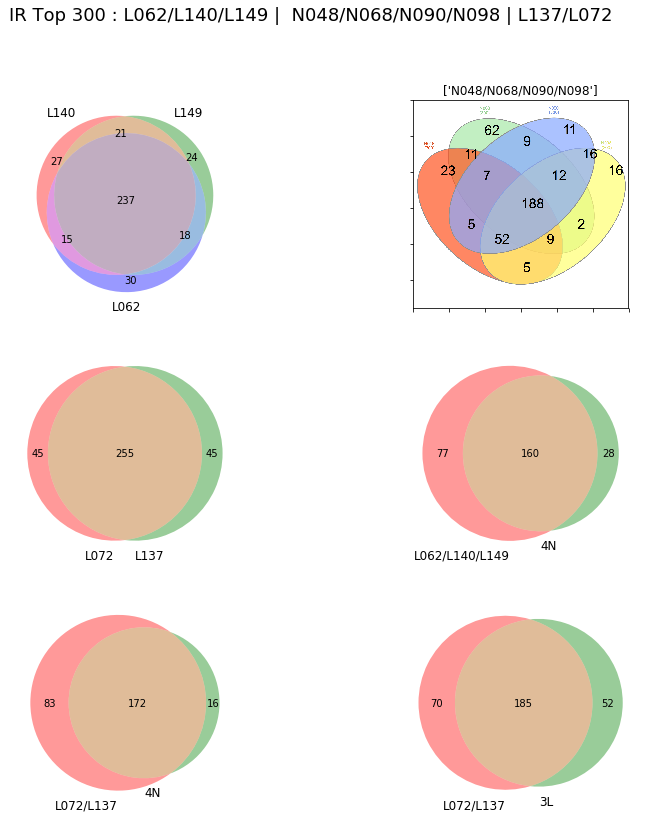

In [20]:
plt.figure(figsize=(13,13))

gs = GridSpec(3, 2)
ax1 = plt.subplot(gs[0,0])
venn3([set(top_list(L140_sorted,300)), set(top_list(L149_sorted,300)), set(top_list(L062_sorted,300))], 
      set_labels = ('L140', 'L149', 'L062'), ax=ax1)

ax2 = plt.subplot(gs[0,1])
img = mpimg.imread('IR_300_4N.png')
plt.imshow(img)
plt.title(['N048/N068/N090/N098'])


ax3 = plt.subplot(gs[1,0])
venn2([set(top_list(L072_sorted,300)), set(top_list(L137_sorted,300))], 
      set_labels = ('L072', 'L137'), ax=ax3)

ax4 = plt.subplot(gs[1,1])
venn2(subsets = (77, 28, 160), set_labels = ('L062/L140/L149', '4N'), ax=ax4)

ax5 = plt.subplot(gs[2,0])
venn2(subsets = (83, 16, 172), set_labels = ('L072/L137', '4N'), ax=ax5)

ax6 = plt.subplot(gs[2,1])
venn2(subsets = (70, 52, 185), set_labels = ('L072/L137', '3L'), ax=ax6)

plt.suptitle("IR Top 300 : L062/L140/L149 |  N048/N068/N090/N098 | L137/L072", size = 18)
make_ticklabels_invisible(plt.gcf())

plt.show()





#### martix of list_IR_300

In [22]:
L062_IR_300_overlap_list = get_overlap(L062_IR_300)[1]
N048_IR_300_overlap_list = get_overlap(N048_IR_300)[1]
L072_IR_300_overlap_list = get_overlap(L072_IR_300)[1]
list_IR_300 = set(list(L062_IR_300_overlap_list) + list(N048_IR_300_overlap_list) + list(L072_IR_300_overlap_list))
list_IR_300 = list(list_IR_300)
print( len(list_IR_300) )
print( list_IR_300[0] )


313
GPSM3


In [25]:
L140_IR_300 = L140_sorted.loc[L140_sorted.index  == 'GPSM3']
for i in list_IR_300:
    a = L140_sorted.loc[L140_sorted.index  == i]
    L140_IR_300 = L140_IR_300.append(a)
L140_IR_300 = L140_IR_300.drop_duplicates(['gene_CER_RPKM'])
L140_IR_300 = L140_IR_300[['gene_CIR_RPKM']]
L140_IR_300.columns = ['L140_IR']
L140_IR_300.to_csv('1.csv')
print( L140_IR_300.shape )

L149_IR_300 = L149_sorted.loc[L149_sorted.index  == 'GPSM3']
for i in list_IR_300:
    a = L149_sorted.loc[L149_sorted.index  == i]
    L149_IR_300 = L149_IR_300.append(a)
L149_IR_300 = L149_IR_300.drop_duplicates(['gene_CER_RPKM'])
L149_IR_300 = L149_IR_300[['gene_CIR_RPKM']]
L149_IR_300.columns = ['L149_IR']
L149_IR_300.to_csv('2.csv')
print(L149_IR_300.shape)

L062_IR_300 = L062_sorted.loc[L062_sorted.index  == 'GPSM3']
for i in list_IR_300:
    a = L062_sorted.loc[L062_sorted.index  == i]
    L062_IR_300 = L062_IR_300.append(a)
L062_IR_300 = L062_IR_300.drop_duplicates(['gene_CER_RPKM'])
L062_IR_300 = L062_IR_300[['gene_CIR_RPKM']]
L062_IR_300.columns = ['L062_IR']
L062_IR_300.to_csv('3.csv')
L062_IR_300.shape

N048_IR_300 = N048_sorted.loc[N048_sorted.index  == 'GPSM3']
for i in list_IR_300:
    a = N048_sorted.loc[N048_sorted.index  == i]
    N048_IR_300 = N048_IR_300.append(a)
N048_IR_300 = N048_IR_300.drop_duplicates(['gene_CER_RPKM'])
N048_IR_300 = N048_IR_300[['gene_CIR_RPKM']]
N048_IR_300.columns = ['N048_IR']
N048_IR_300.to_csv('4.csv')
N048_IR_300.shape

N068_IR_300 = N068_sorted.loc[N068_sorted.index  == 'GPSM3']
for i in list_IR_300:
    a = N068_sorted.loc[N068_sorted.index  == i]
    N068_IR_300 = N068_IR_300.append(a)
N068_IR_300 = N068_IR_300.drop_duplicates(['gene_CER_RPKM'])
N068_IR_300 = N068_IR_300[['gene_CIR_RPKM']]
N068_IR_300.columns = ['N068_IR']
N068_IR_300.to_csv('5.csv')
N068_IR_300.shape

N090_IR_300 = N090_sorted.loc[N090_sorted.index  == 'GPSM3']
for i in list_IR_300:
    a = N090_sorted.loc[N090_sorted.index  == i]
    N090_IR_300 = N090_IR_300.append(a)
N090_IR_300 = N090_IR_300.drop_duplicates(['gene_CER_RPKM'])
N090_IR_300 = N090_IR_300[['gene_CIR_RPKM']]
N090_IR_300.columns = ['N090_IR']
N090_IR_300.to_csv('6.csv')
N090_IR_300.shape

N098_IR_300 = N098_sorted.loc[N098_sorted.index  == 'GPSM3']
for i in list_IR_300:
    a = N098_sorted.loc[N098_sorted.index  == i]
    N098_IR_300 = N098_IR_300.append(a)
N098_IR_300 = N098_IR_300.drop_duplicates(['gene_CER_RPKM'])
N098_IR_300 = N098_IR_300[['gene_CIR_RPKM']]
N098_IR_300.columns = ['N098_IR']
N098_IR_300.to_csv('7.csv')
N098_IR_300.shape

L072_IR_300 = L072_sorted.loc[L072_sorted.index  == 'GPSM3']
for i in list_IR_300:
    a = L072_sorted.loc[L072_sorted.index  == i]
    L072_IR_300 = L072_IR_300.append(a)
L072_IR_300 = L072_IR_300.drop_duplicates(['gene_CER_RPKM'])
L072_IR_300 = L072_IR_300[['gene_CIR_RPKM']]
L072_IR_300.columns = ['L072_IR']
L072_IR_300.to_csv('8.csv')
L072_IR_300.shape

L137_IR_300 = L137_sorted.loc[L137_sorted.index  == 'GPSM3']
for i in list_IR_300:
    a = L137_sorted.loc[L137_sorted.index  == i]
    L137_IR_300 = L137_IR_300.append(a)
L137_IR_300 = L137_IR_300.drop_duplicates(['gene_CER_RPKM'])
L137_IR_300 = L137_IR_300[['gene_CIR_RPKM']]
L137_IR_300.columns = ['L137_IR']
L137_IR_300.to_csv('9.csv')
L137_IR_300.shape

L074_IR_300 = L074_sorted.loc[L074_sorted.index  == 'GPSM3']
for i in list_IR_300:
    a = L074_sorted.loc[L074_sorted.index  == i]
    L074_IR_300 = L074_IR_300.append(a)
L074_IR_300 = L074_IR_300.drop_duplicates(['gene_CER_RPKM'])
L074_IR_300 = L074_IR_300[['gene_CIR_RPKM']]
L074_IR_300.columns = ['L074_IR']
L074_IR_300.to_csv('10.csv')
L074_IR_300.shape

L115_IR_300 = L115_sorted.loc[L115_sorted.index  == 'GPSM3']
for i in list_IR_300:
    a = L115_sorted.loc[L115_sorted.index  == i]
    L115_IR_300 = L115_IR_300.append(a)
L115_IR_300 = L115_IR_300.drop_duplicates(['gene_CER_RPKM'])
L115_IR_300 = L115_IR_300[['gene_CIR_RPKM']]
L115_IR_300.columns = ['L115_IR']
L115_IR_300.to_csv('11.csv')
L115_IR_300.shape

L133_IR_300 = L133_sorted.loc[L133_sorted.index  == 'GPSM3']
for i in list_IR_300:
    a = L133_sorted.loc[L133_sorted.index  == i]
    L133_IR_300 = L133_IR_300.append(a)
L133_IR_300 = L133_IR_300.drop_duplicates(['gene_CER_RPKM'])
L133_IR_300 = L133_IR_300[['gene_CIR_RPKM']]
L133_IR_300.columns = ['L133_IR']
L133_IR_300.to_csv('12.csv')
L133_IR_300.shape

L005_IR_300 = L005_sorted.loc[L005_sorted.index  == 'GPSM3']
for i in list_IR_300:
    a = L005_sorted.loc[L005_sorted.index  == i]
    L005_IR_300 = L005_IR_300.append(a)
L005_IR_300 = L005_IR_300.drop_duplicates(['gene_CER_RPKM'])
L005_IR_300 = L005_IR_300[['gene_CIR_RPKM']]
L005_IR_300.columns = ['L005_IR']
L005_IR_300.to_csv('13.csv')
L005_IR_300.shape

L027_IR_300 = L027_sorted.loc[L027_sorted.index  == 'GPSM3']
for i in list_IR_300:
    a = L027_sorted.loc[L027_sorted.index  == i]
    L027_IR_300 = L027_IR_300.append(a)
L027_IR_300 = L027_IR_300.drop_duplicates(['gene_CER_RPKM'])
L027_IR_300 = L027_IR_300[['gene_CIR_RPKM']]
L027_IR_300.columns = ['L027_IR']
L027_IR_300.to_csv('14.csv')
L027_IR_300.shape

L031_IR_300 = L031_sorted.loc[L031_sorted.index  == 'GPSM3']
for i in list_IR_300:
    a = L031_sorted.loc[L031_sorted.index  == i]
    L031_IR_300 = L031_IR_300.append(a)
L031_IR_300 = L031_IR_300.drop_duplicates(['gene_CER_RPKM'])
L031_IR_300 = L031_IR_300[['gene_CIR_RPKM']]
L031_IR_300.columns = ['L031_IR']
L031_IR_300.to_csv('15.csv')
L031_IR_300.shape

L078_IR_300 = L078_sorted.loc[L078_sorted.index  == 'GPSM3']
for i in list_IR_300:
    a = L078_sorted.loc[L078_sorted.index  == i]
    L078_IR_300 = L078_IR_300.append(a)
L078_IR_300 = L078_IR_300.drop_duplicates(['gene_CER_RPKM'])
L078_IR_300 = L078_IR_300[['gene_CIR_RPKM']]
L078_IR_300.columns = ['L078_IR']
L078_IR_300.to_csv('16.csv')
L078_IR_300.shape

L102_IR_300 = L102_sorted.loc[L102_sorted.index  == 'GPSM3']
for i in list_IR_300:
    a = L102_sorted.loc[L102_sorted.index  == i]
    L102_IR_300 = L102_IR_300.append(a)
L102_IR_300 = L102_IR_300.drop_duplicates(['gene_CER_RPKM'])
L102_IR_300 = L102_IR_300[['gene_CIR_RPKM']]
L102_IR_300.columns = ['L102_IR']
L102_IR_300.to_csv('17.csv')
print(L102_IR_300.head(3))

(313, 1)
(313, 1)
          L102_IR
gene_id          
GPSM3    1.743913
TBRG1    0.507840
BLOC1S3  5.396966


In [ ]:
IR_300_bin = pd.read_csv('IR_300.csv')
IR_300_bin.index = IR_300_bin['gene_id']
IR_300_bin = IR_300_bin.drop(['gene_id'], axis='columns')
sample_ID = IR_300_bin.columns.values
gene_ID = IR_300_bin.index.values
IRs = IR_300_bin.values
sample_ID = [x.split('_')[0] for x in sample_ID]
IR_300_bin.head(3)

In [ ]:
n_sample = len(sample_ID)
x0 = np.arange(n_sample)
colors = []
colors.extend(['r']*3)
colors.extend(['c']*4)
colors.extend(['b']*2)
colors.extend(['g']*8)

for i in range(len(gene_ID)): 
    plt.bar(x0, IRs[i], color = colors)
    plt.ylabel('IR_RPKM')
    plt.title('IR of Gene ' + gene_ID[i])
    plt.xticks(x0, sample_ID, rotation = 45)
    
    plt.subplots_adjust(top = 0.6, bottom = 0.1, left = 0.1, right = 1.0)
    plt.savefig("./IR300_Union/IR300_Values_" + gene_ID[i] +".png", bbox_inches='tight', dpi=400)

In [84]:
IR_300_bin_9 = pd.read_csv('IR_300_9.csv')
IR_300_bin_9 = IR_300_bin_9.set_index('gene_id')

sample_ID_9 = IR_300_bin_9.columns.values
sample_ID_9 = [x.split('_')[0] for x in sample_ID_9]

gene_ID_9 = IR_300_bin_9.index.values.tolist()
IRs_9 = IR_300_bin_9.values.tolist()

In [103]:
IR_300_bin_9.head(5)

,L140_IR,L149_IR,L062_IR,N048_IR,N068_IR,N090_IR,N098_IR,L072_IR,L137_IR
gene_id,,,,,,,,,
SH3BGRL3,1.174262,2.293575,1.667829,2.241618,1.713226,3.344385,4.340240,2.591825,2.350234
NR4A2,1.215798,4.972265,2.043223,13.523313,0.358471,12.009358,16.829314,2.377716,7.876076
PSMD5-AS1,1.219335,4.617229,5.280559,3.029363,1.122077,3.085099,2.659274,3.483671,3.709487
DIMT1,1.839009,2.813748,3.274713,1.190310,3.060666,3.336126,2.344398,3.407814,2.565242
YPEL5,2.290256,2.875618,2.444608,3.492128,0.786721,5.875672,6.274218,2.012528,6.051664


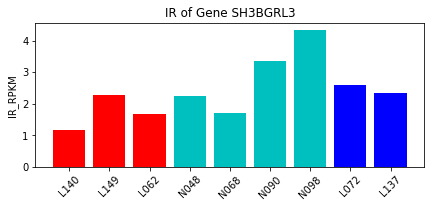

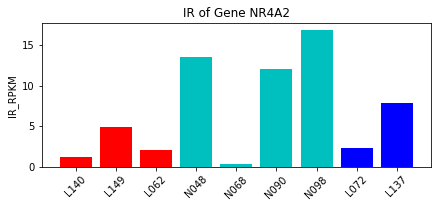

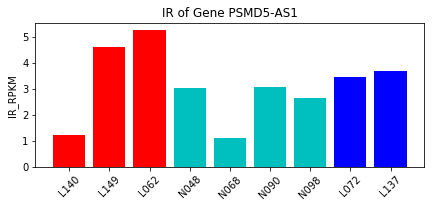

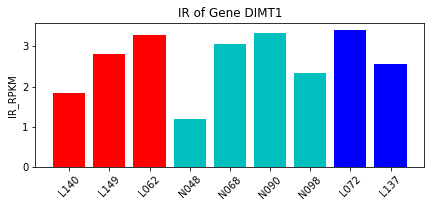

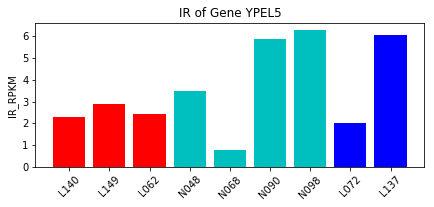

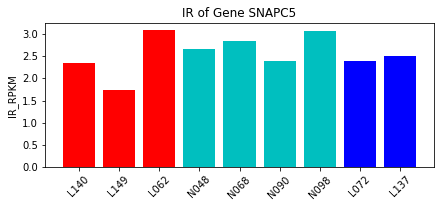

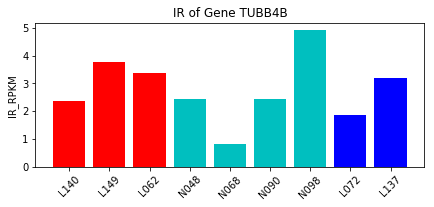

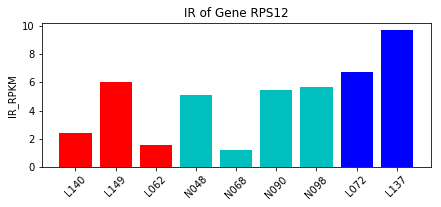

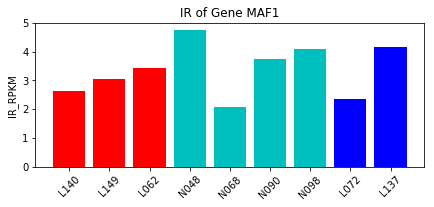

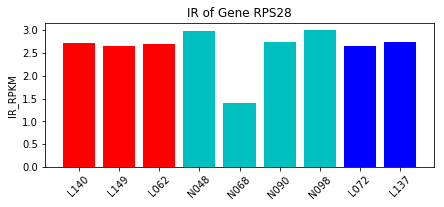

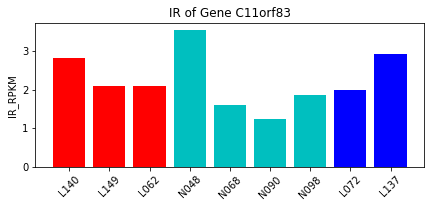

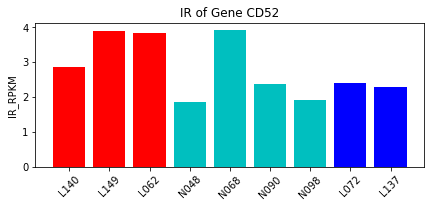

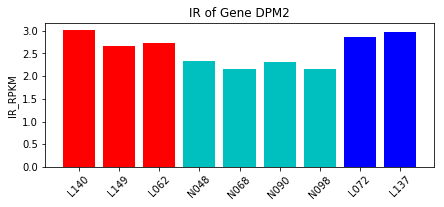

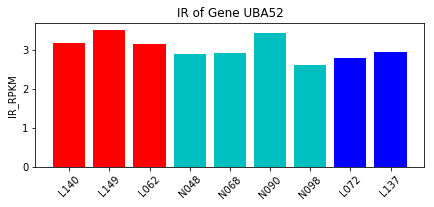

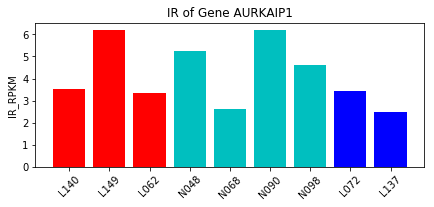

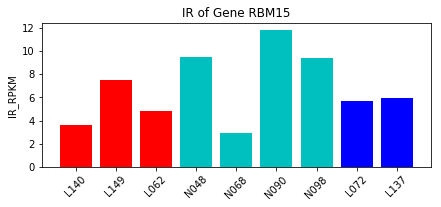

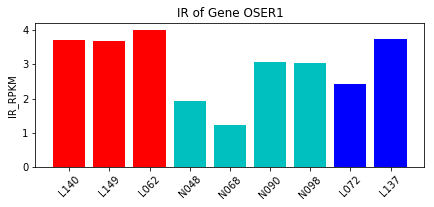

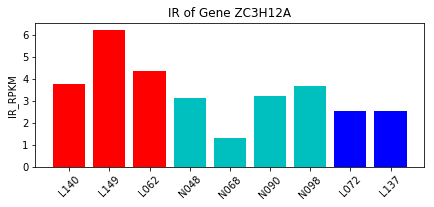

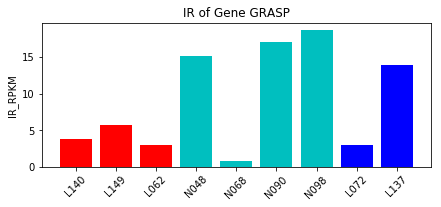

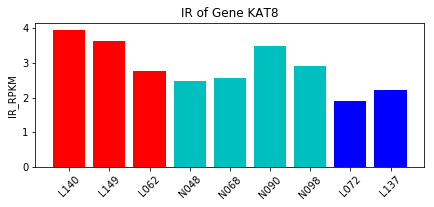

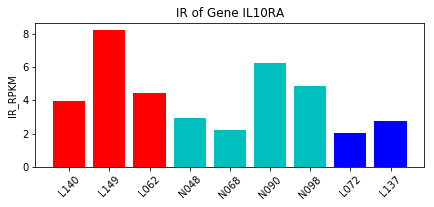

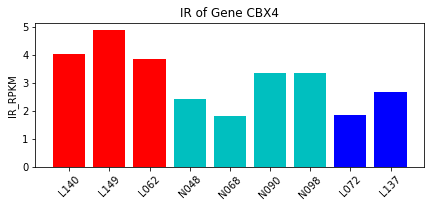

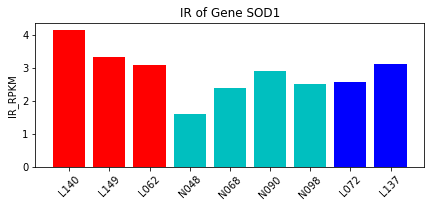

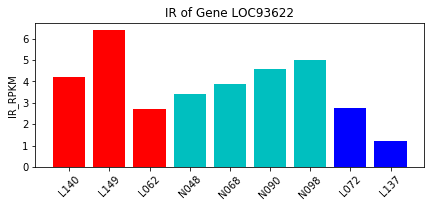

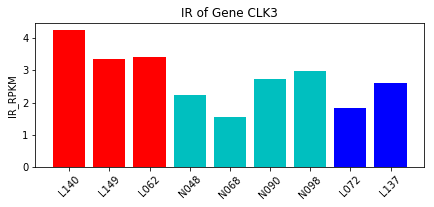

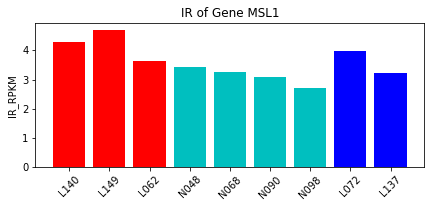

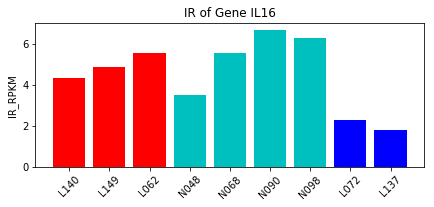

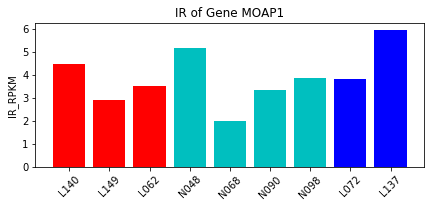

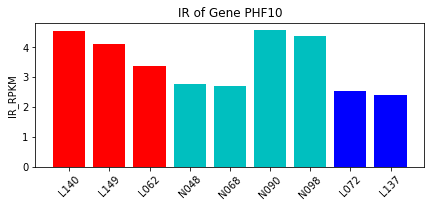

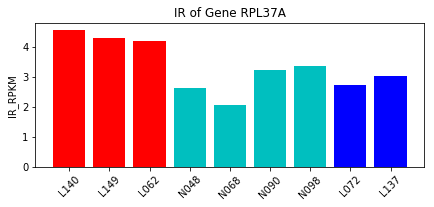

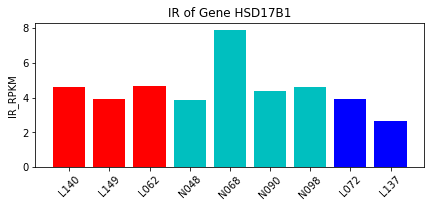

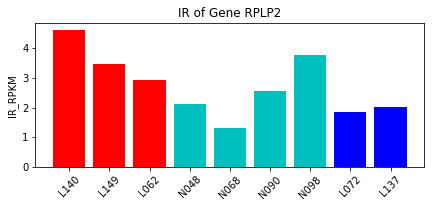

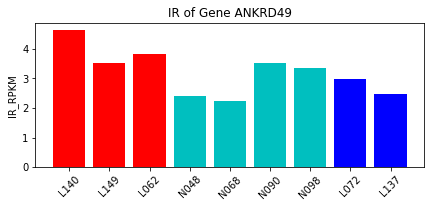

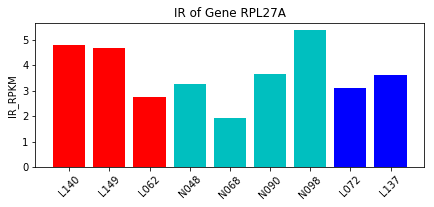

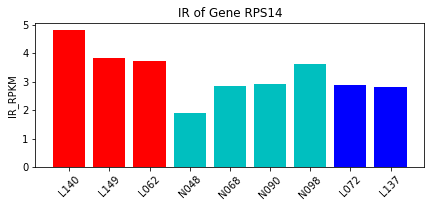

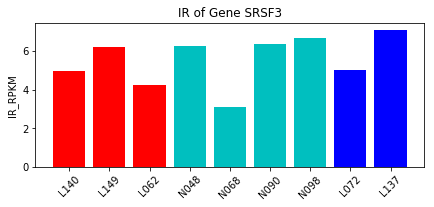

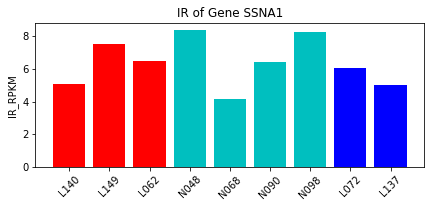

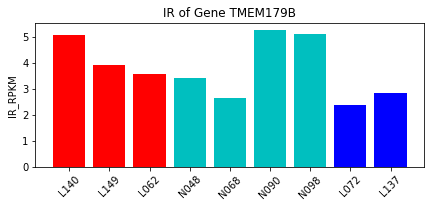

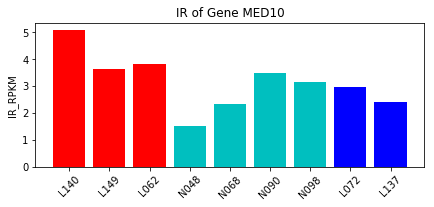

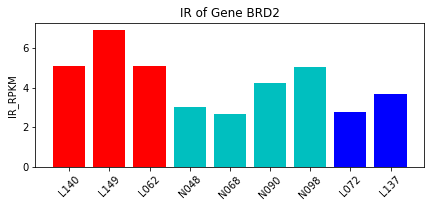

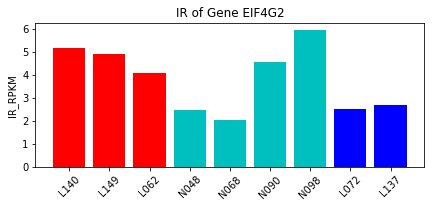

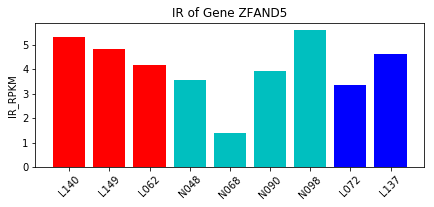

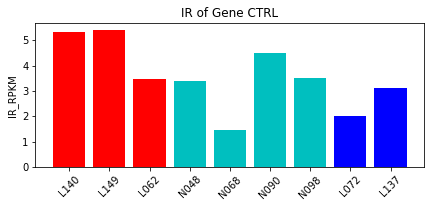

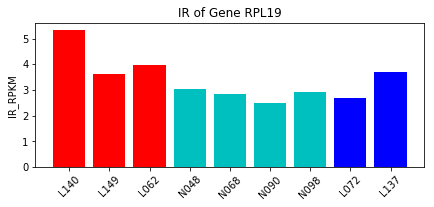

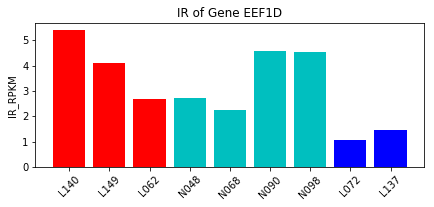

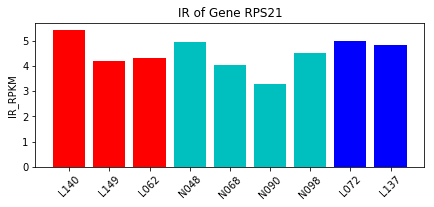

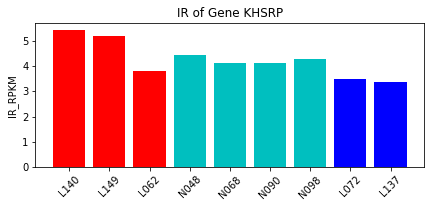

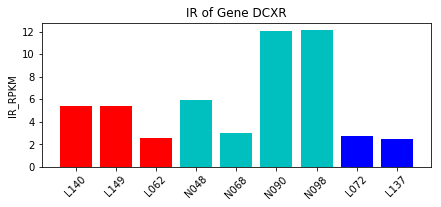

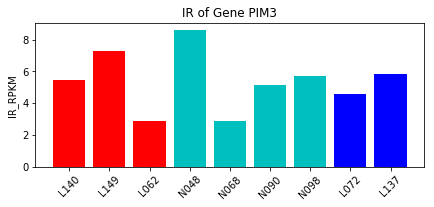

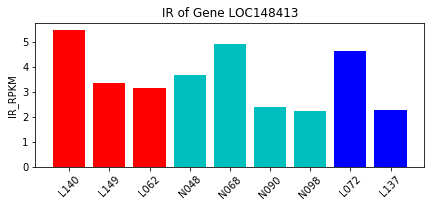

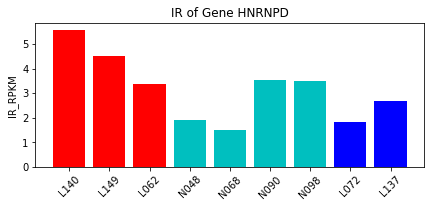

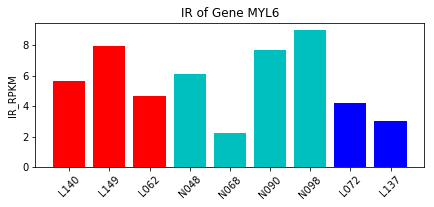

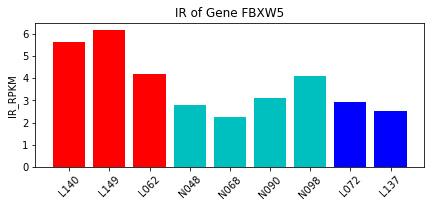

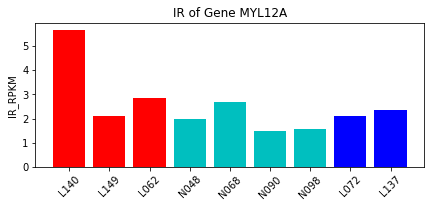

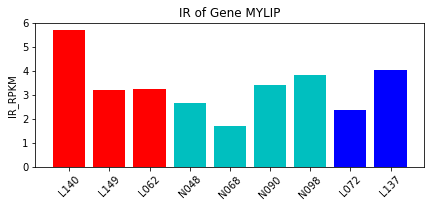

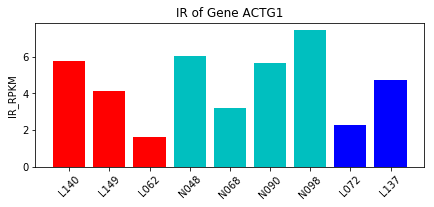

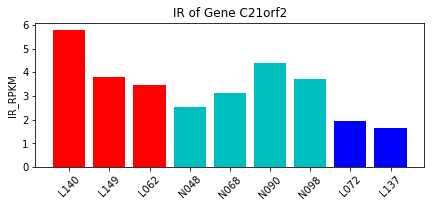

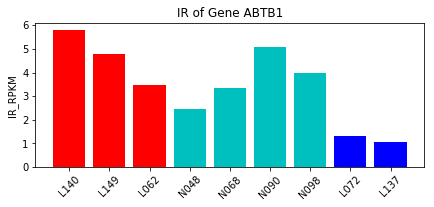

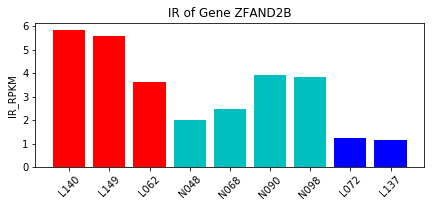

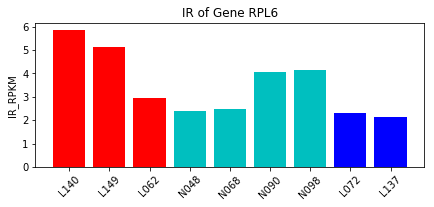

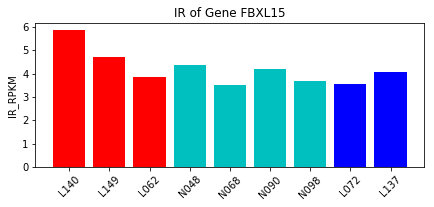

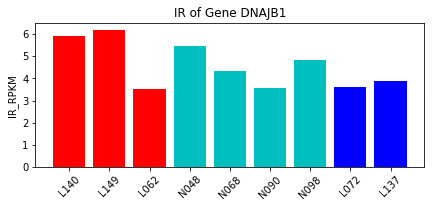

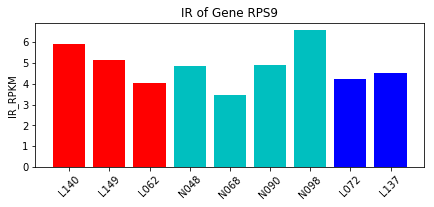

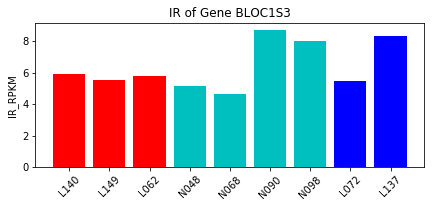

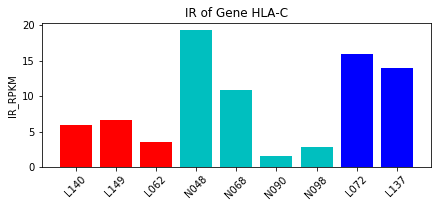

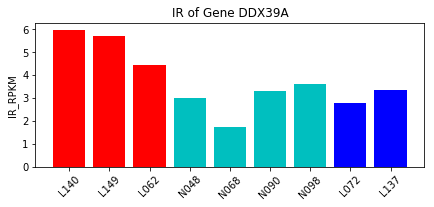

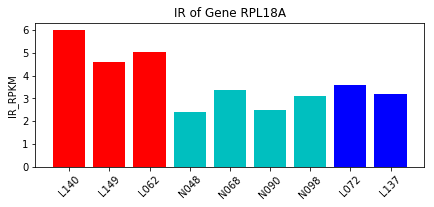

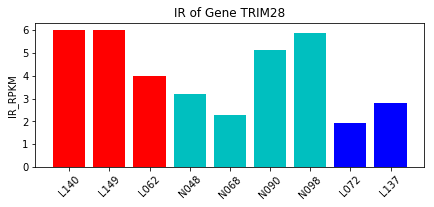

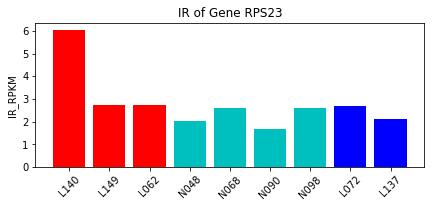

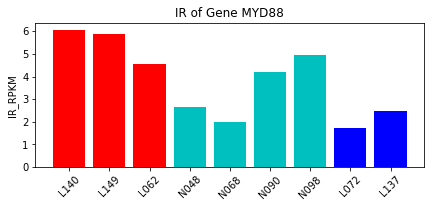

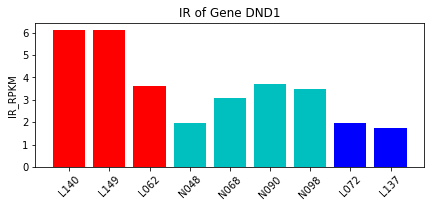

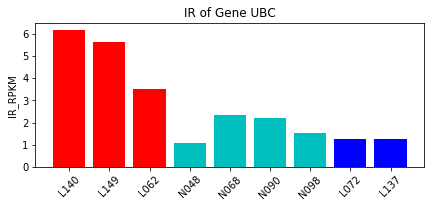

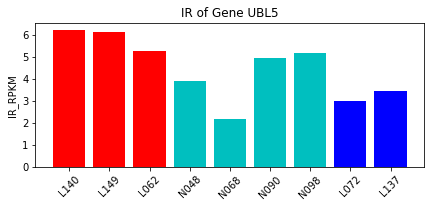

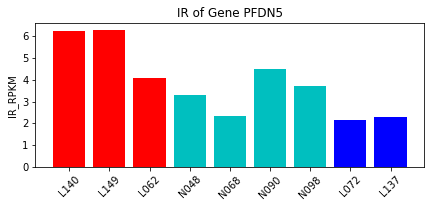

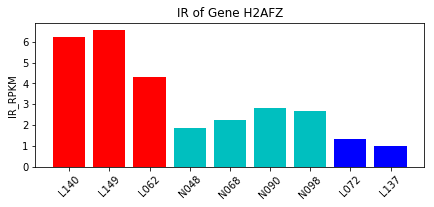

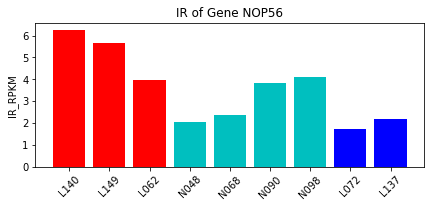

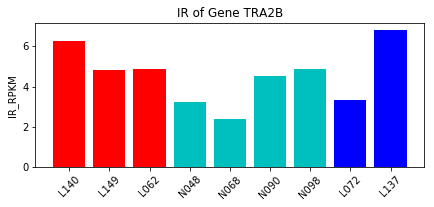

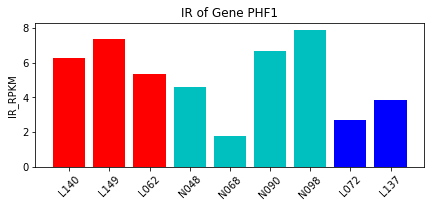

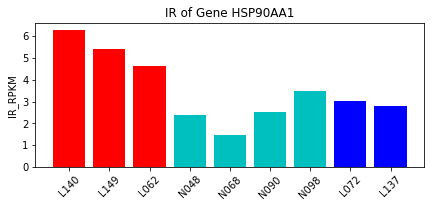

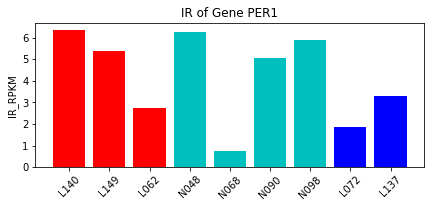

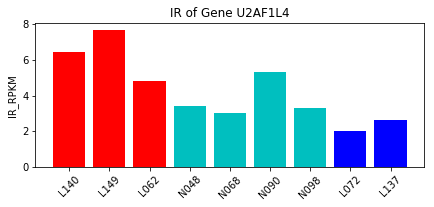

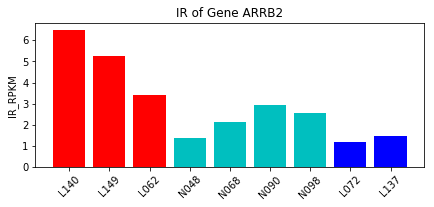

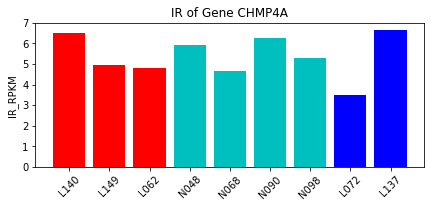

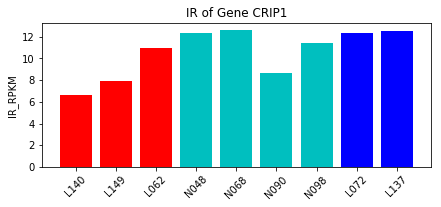

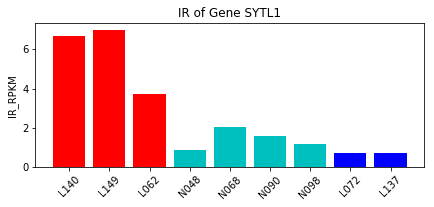

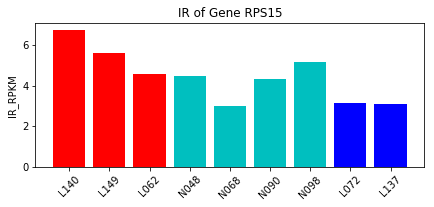

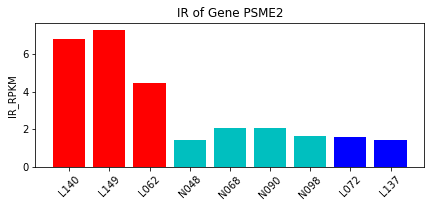

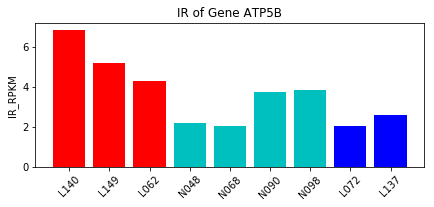

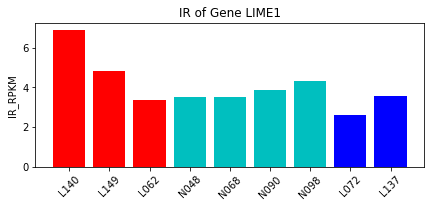

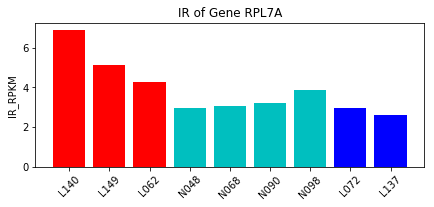

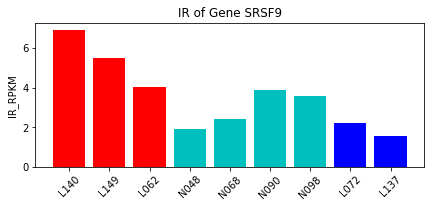

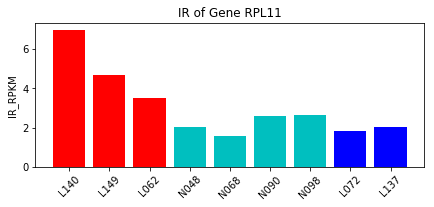

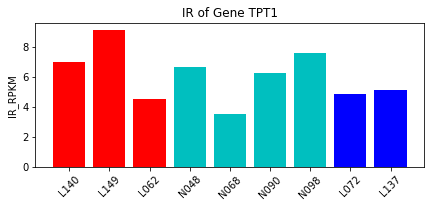

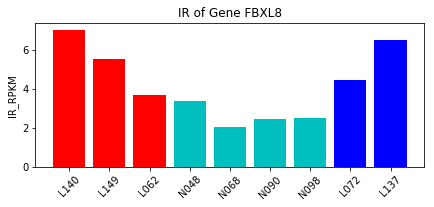

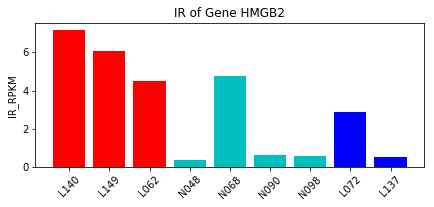

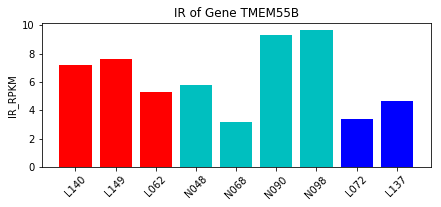

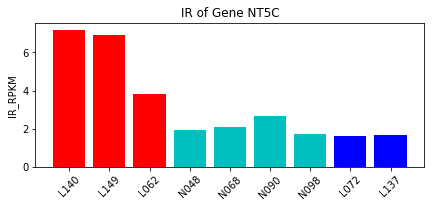

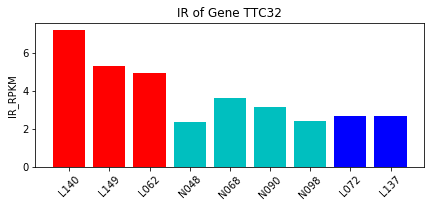

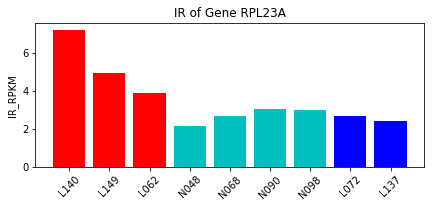

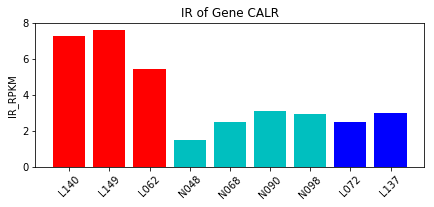

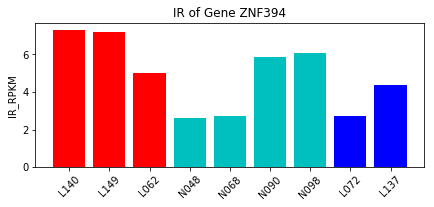

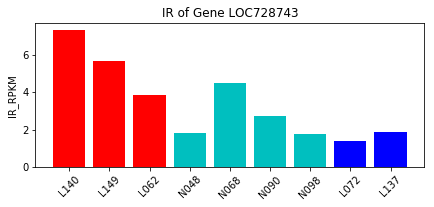

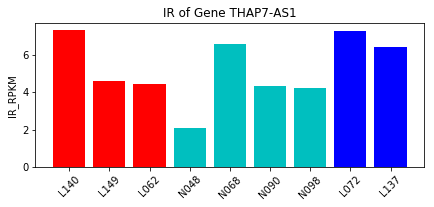

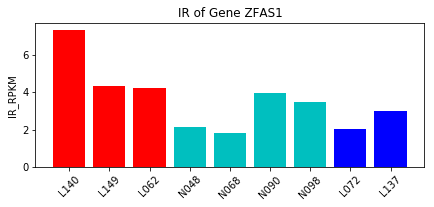

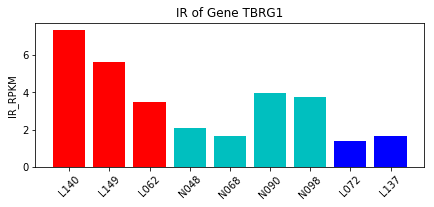

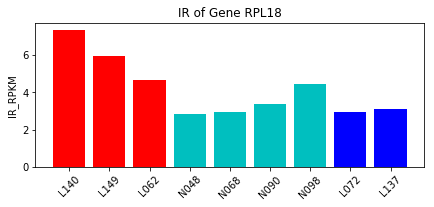

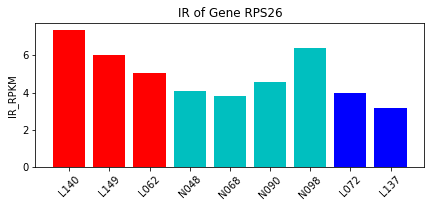

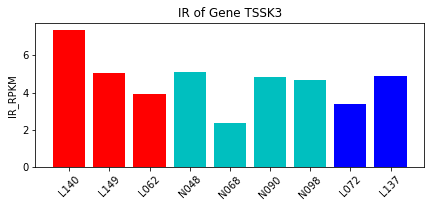

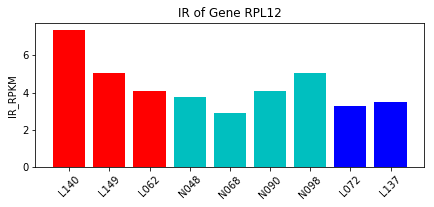

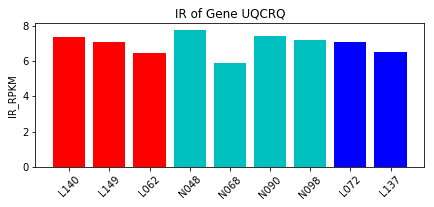

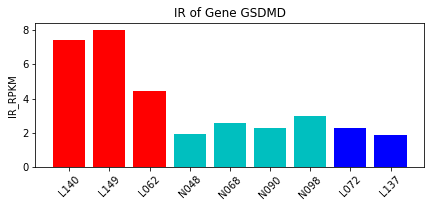

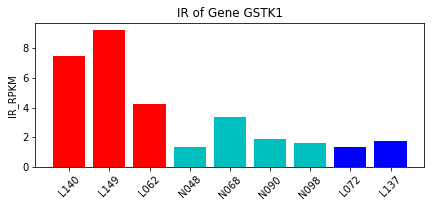

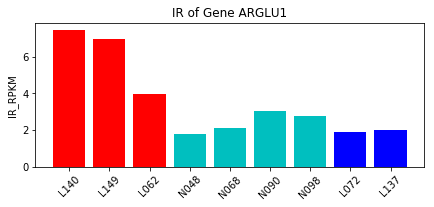

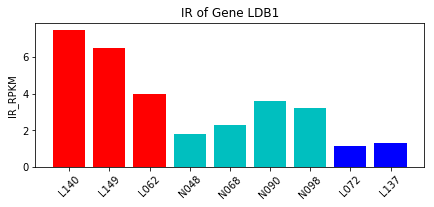

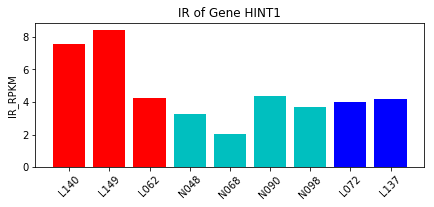

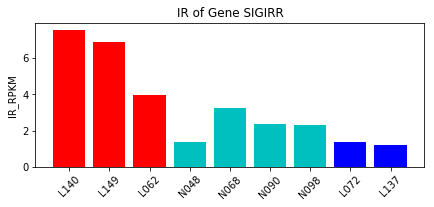

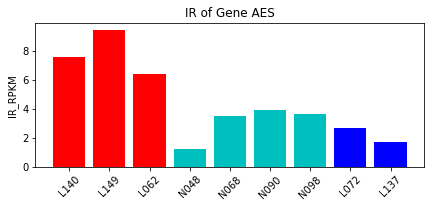

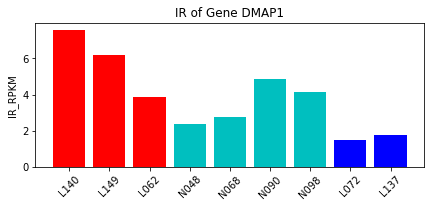

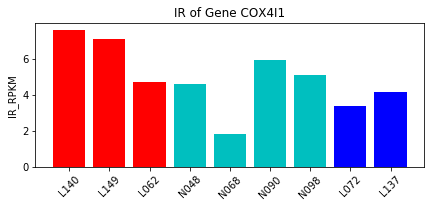

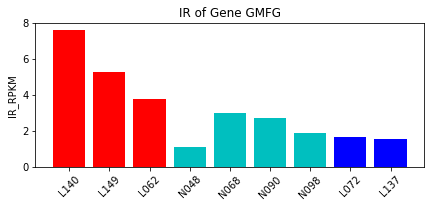

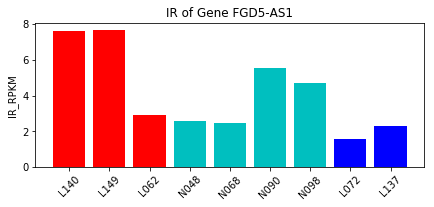

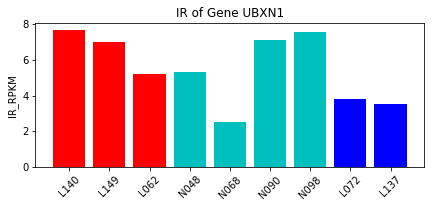

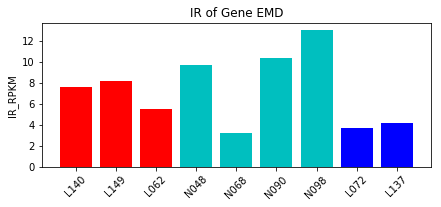

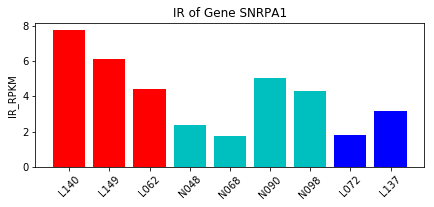

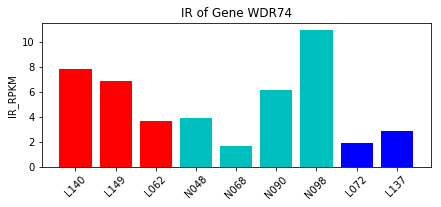

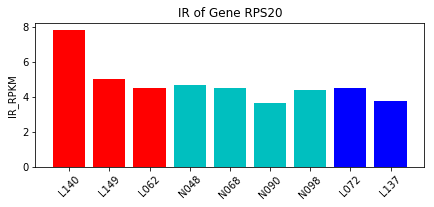

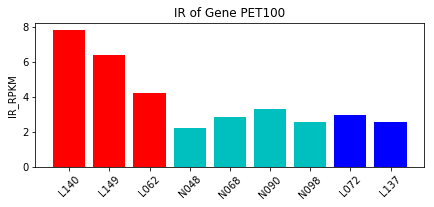

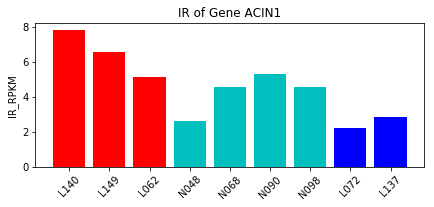

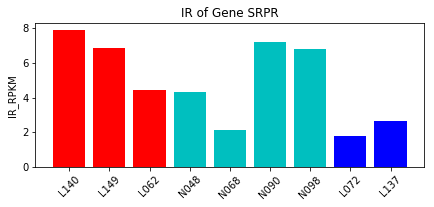

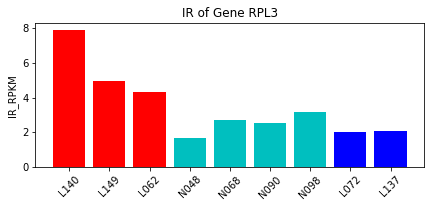

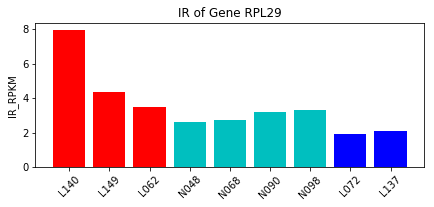

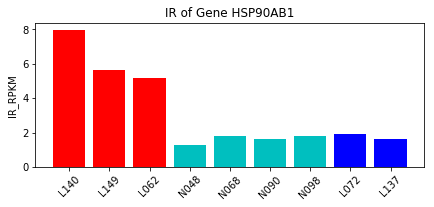

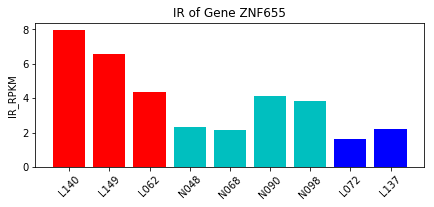

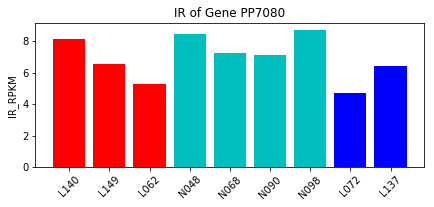

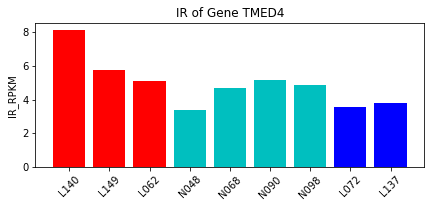

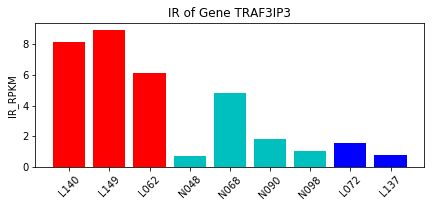

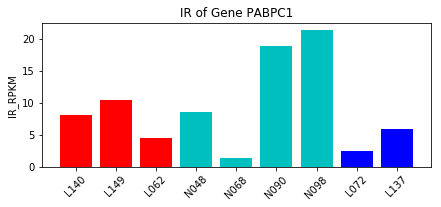

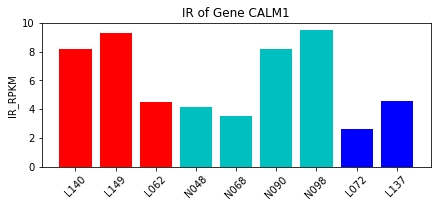

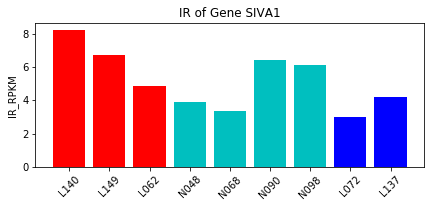

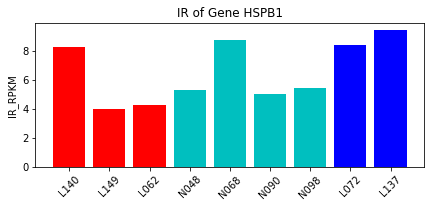

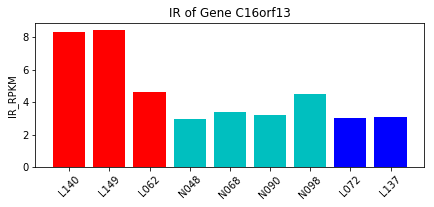

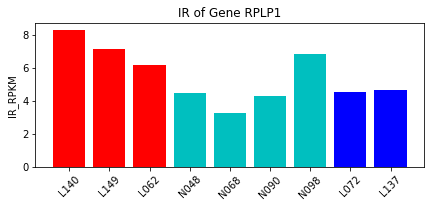

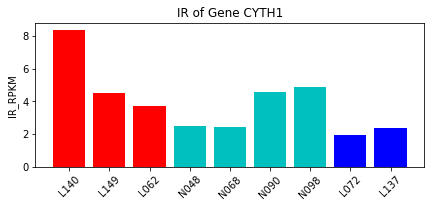

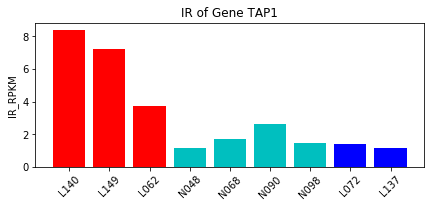

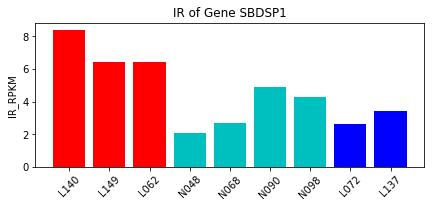

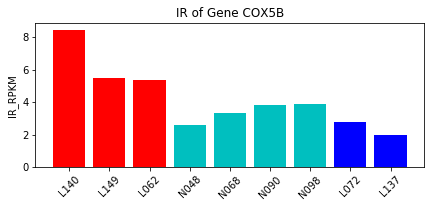

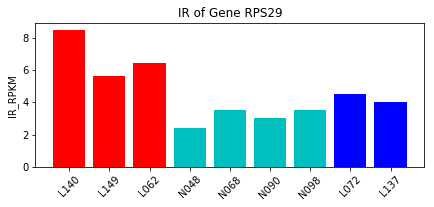

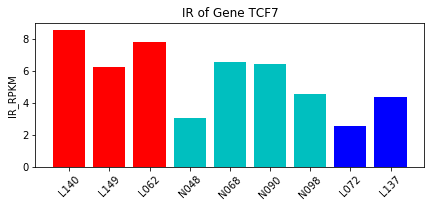

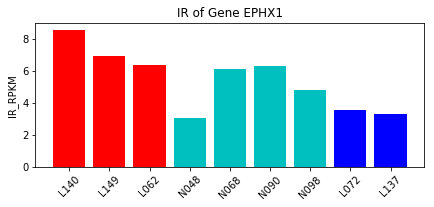

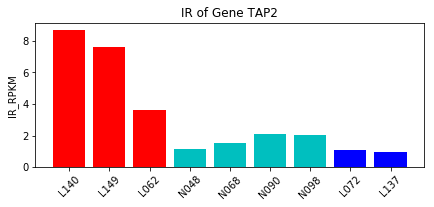

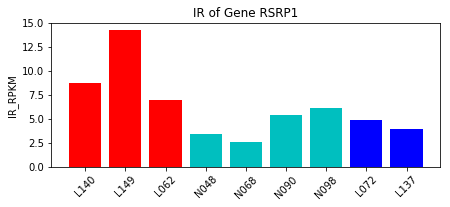

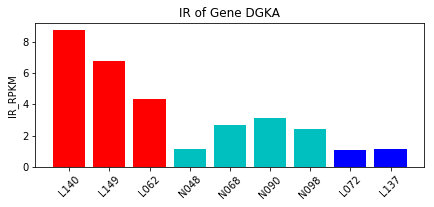

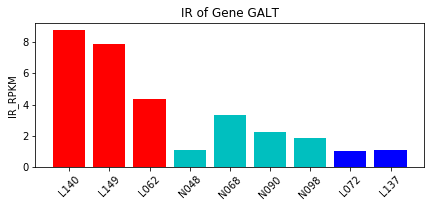

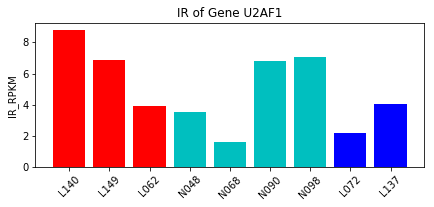

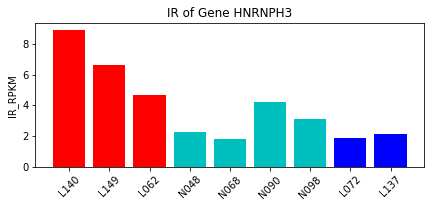

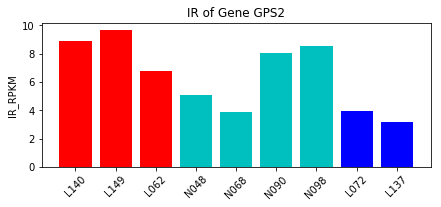

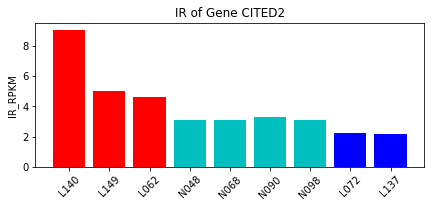

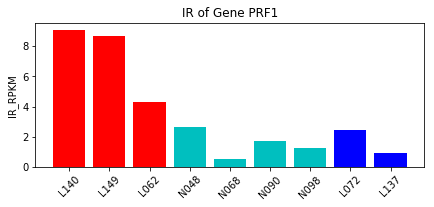

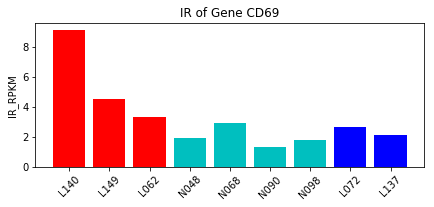

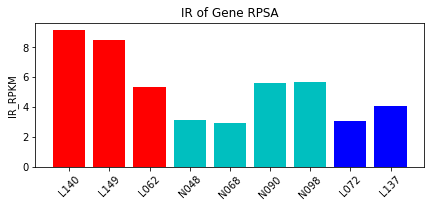

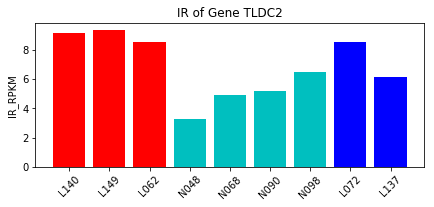

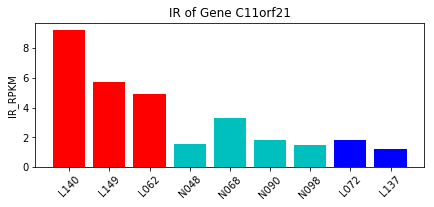

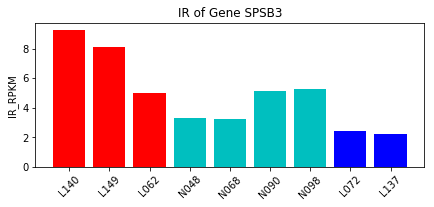

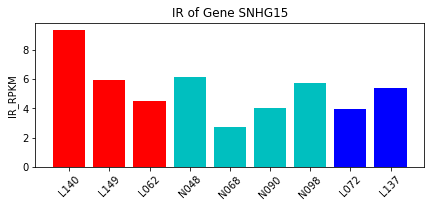

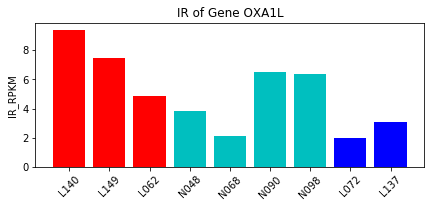

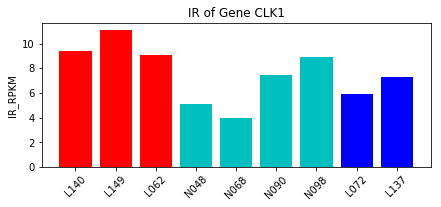

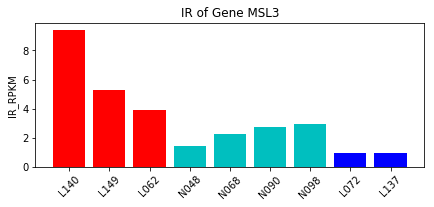

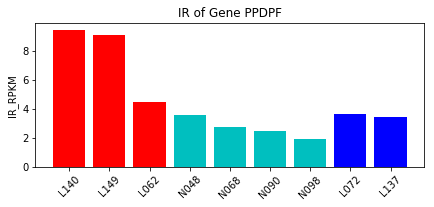

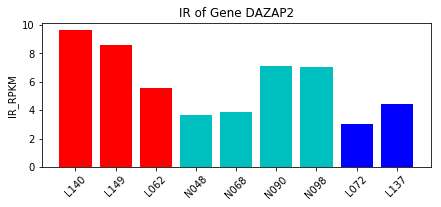

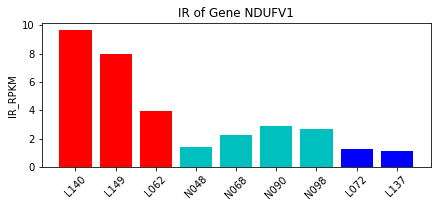

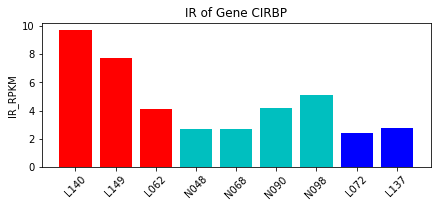

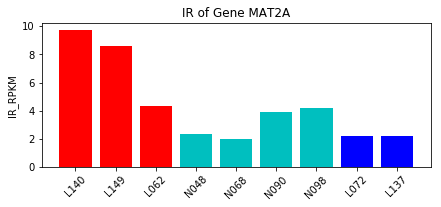

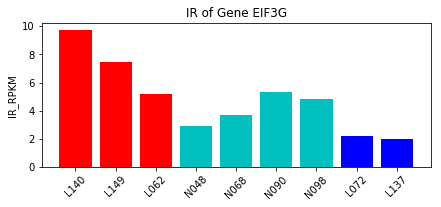

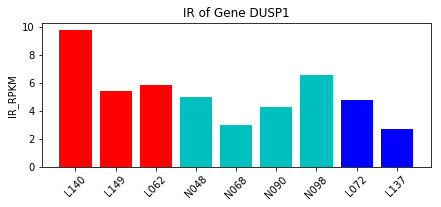

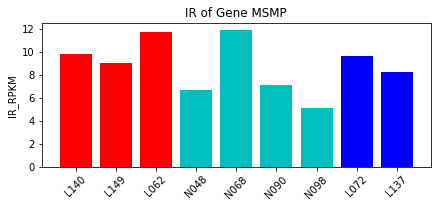

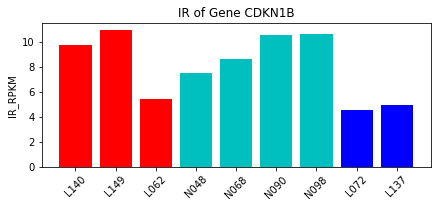

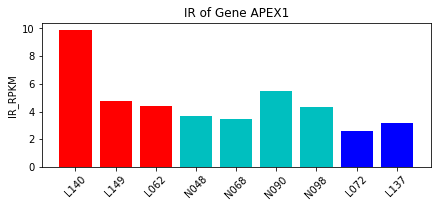

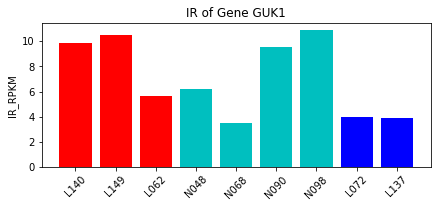

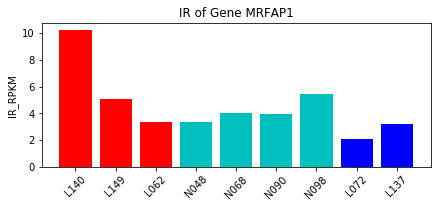

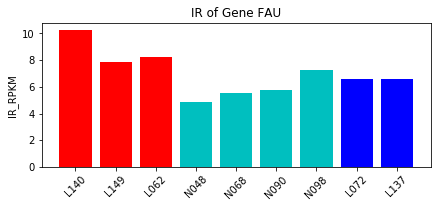

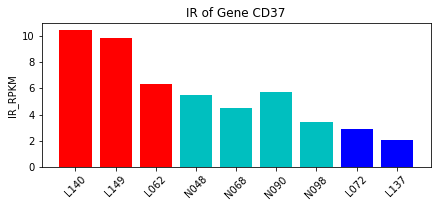

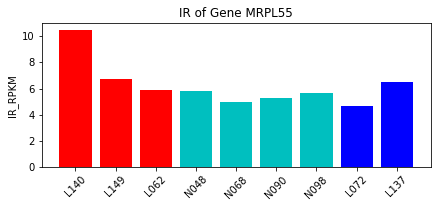

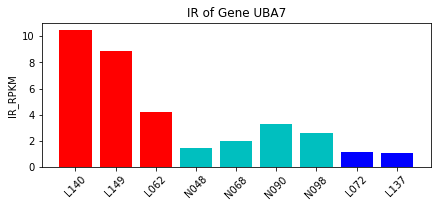

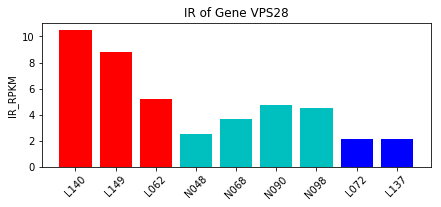

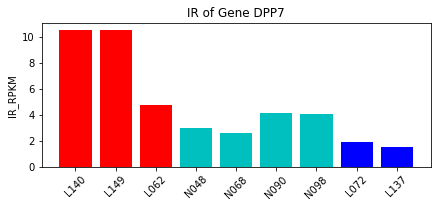

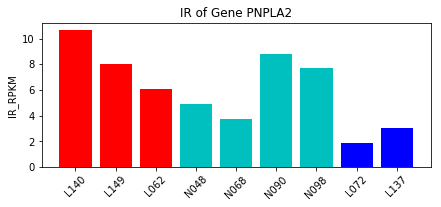

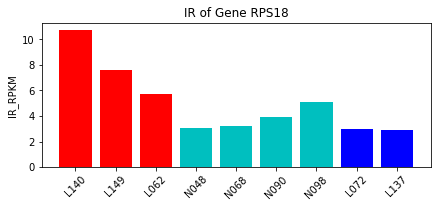

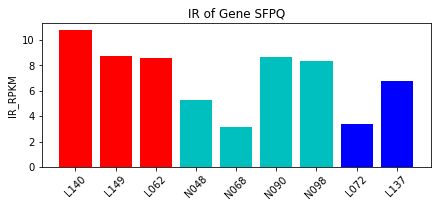

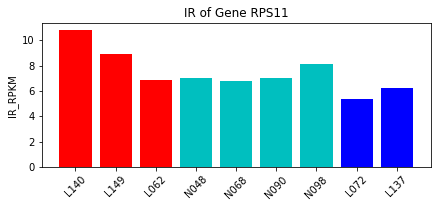

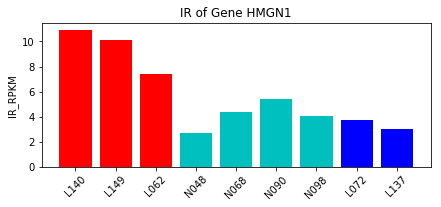

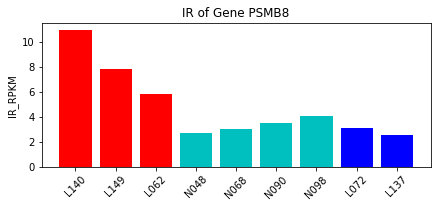

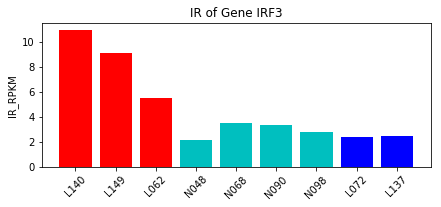

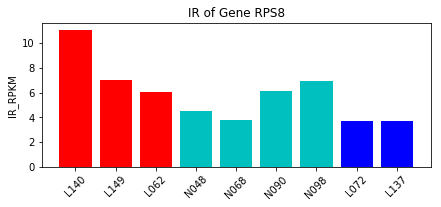

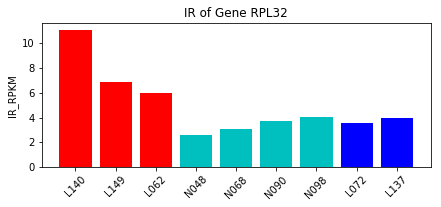

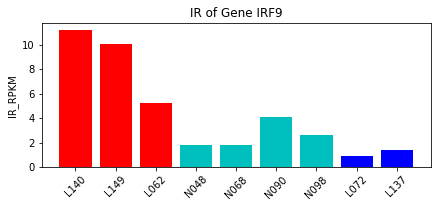

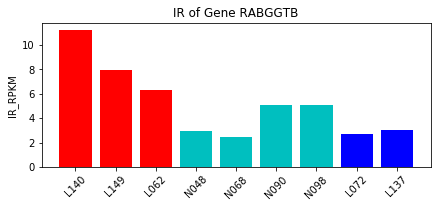

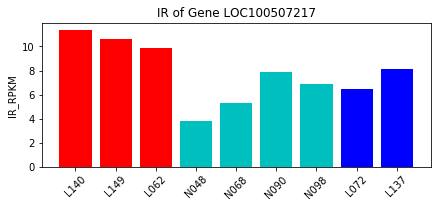

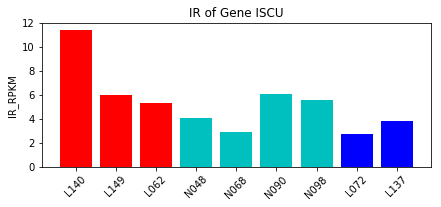

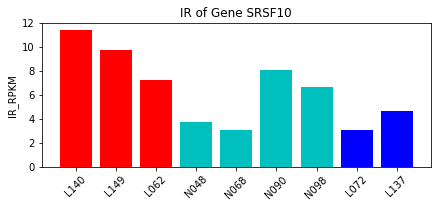

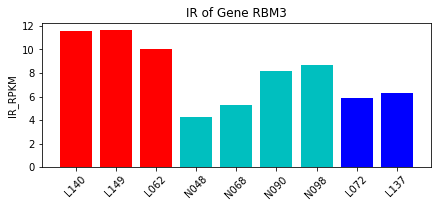

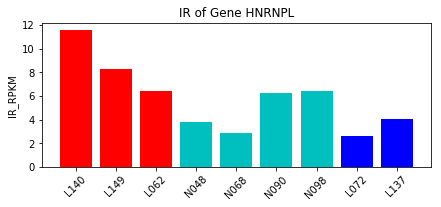

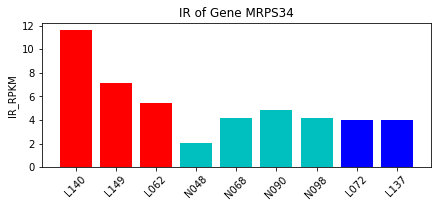

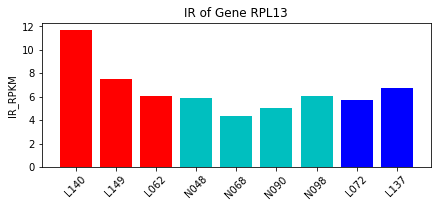

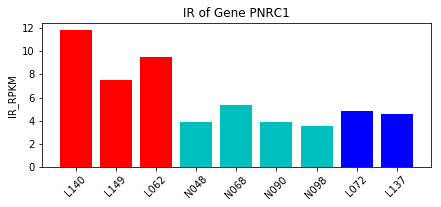

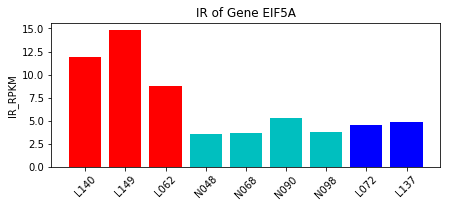

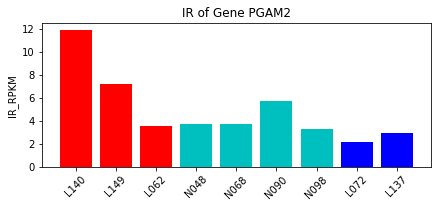

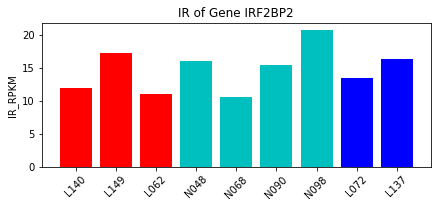

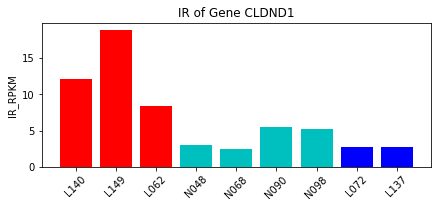

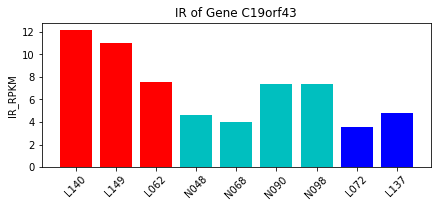

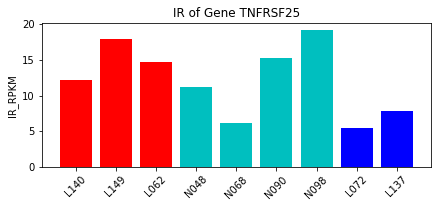

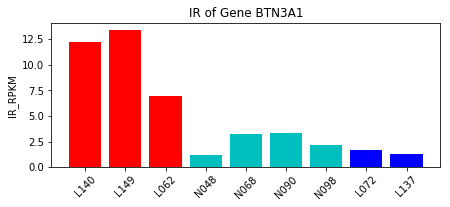

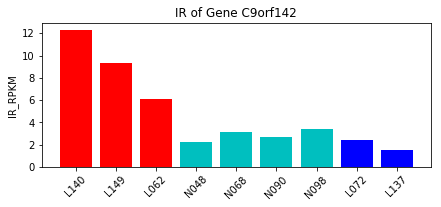

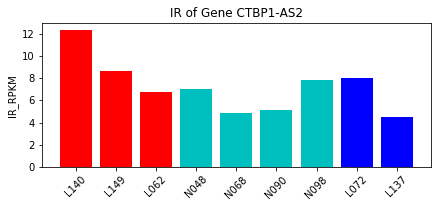

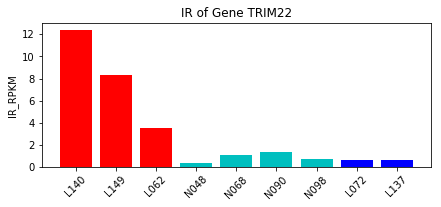

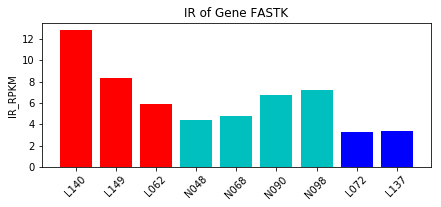

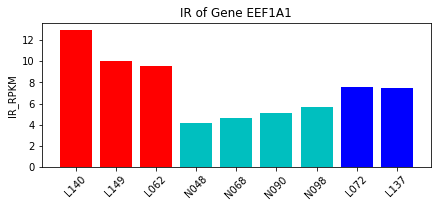

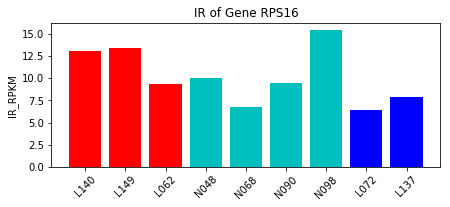

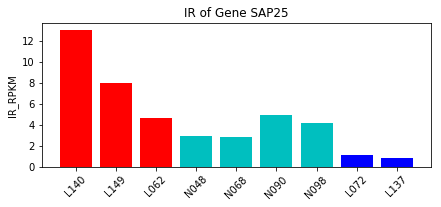

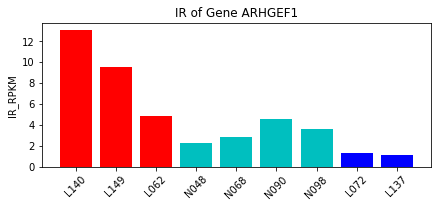

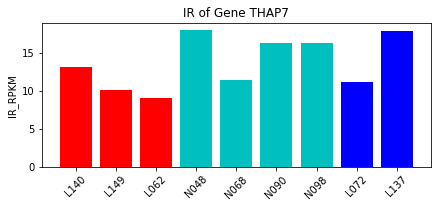

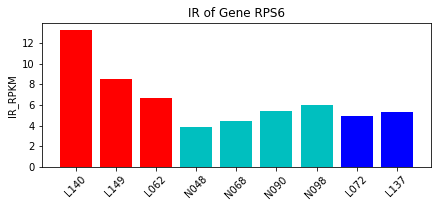

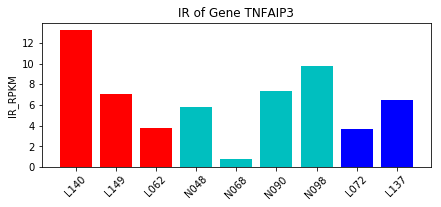

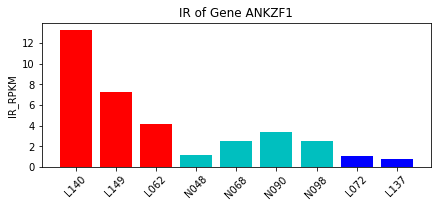

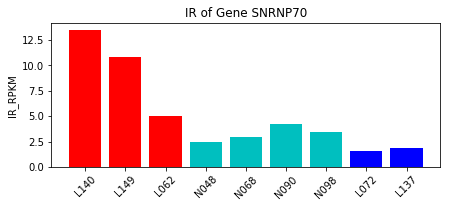

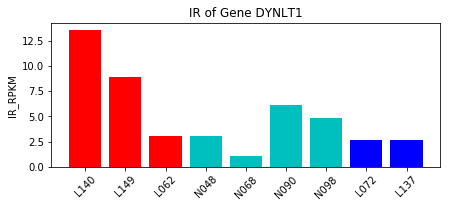

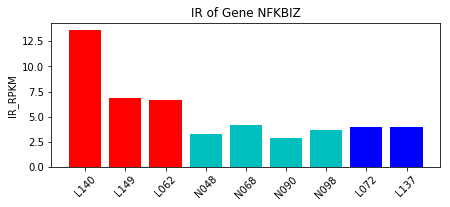

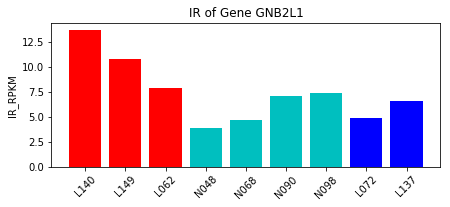

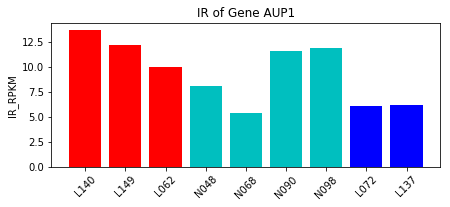

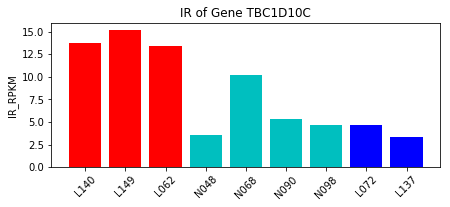

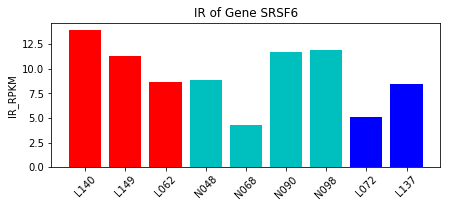

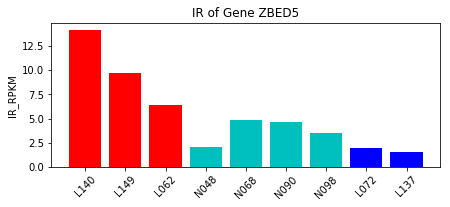

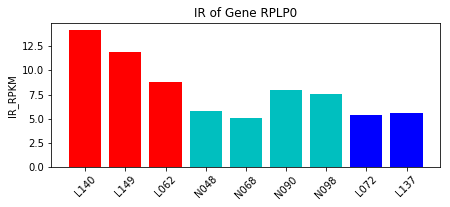

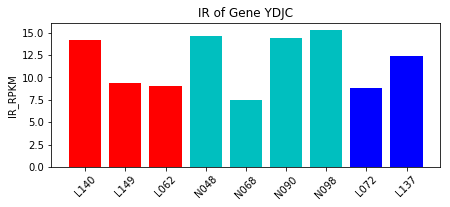

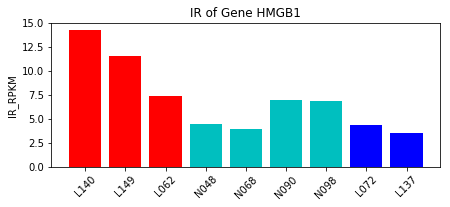

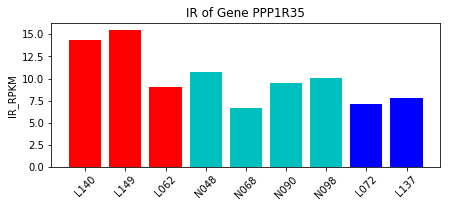

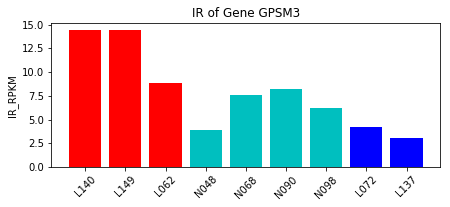

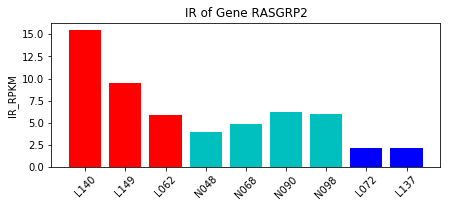

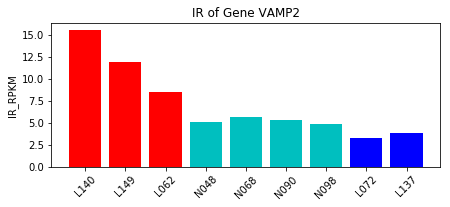

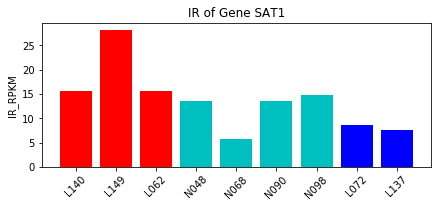

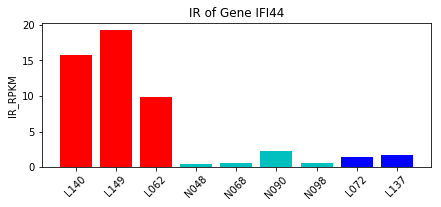

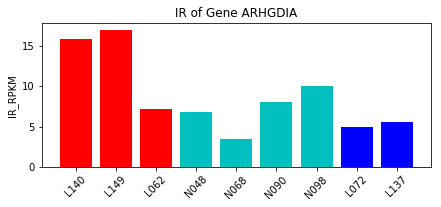

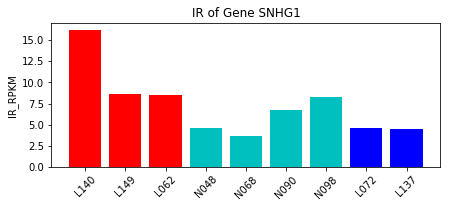

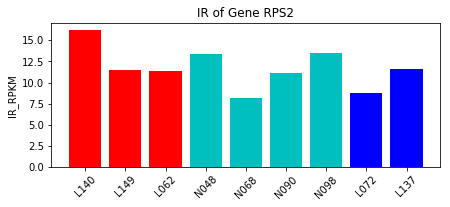

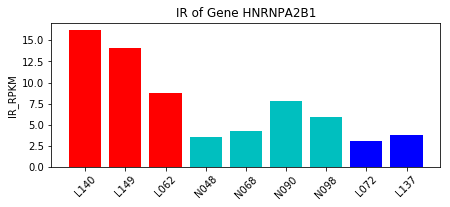

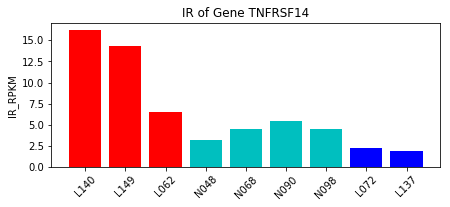

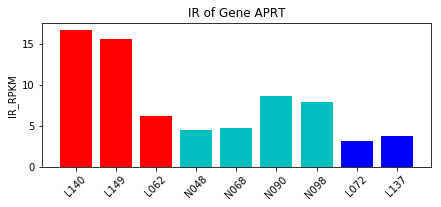

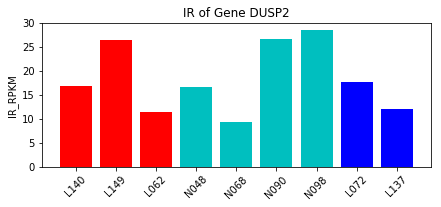

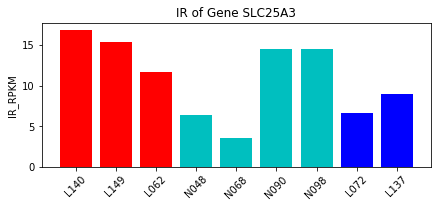

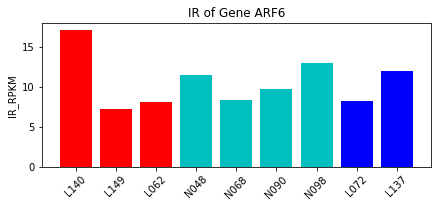

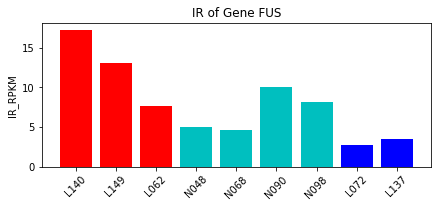

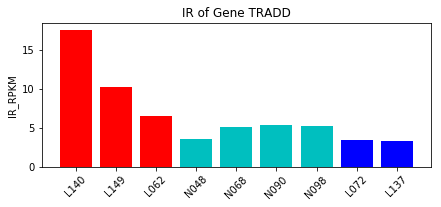

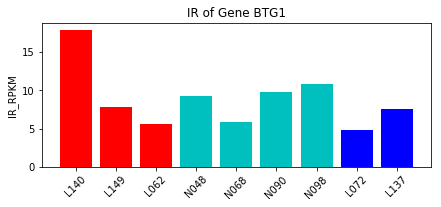

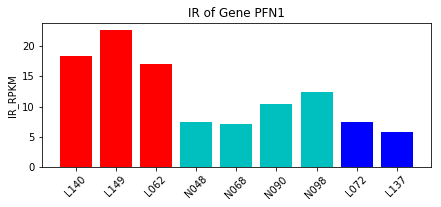

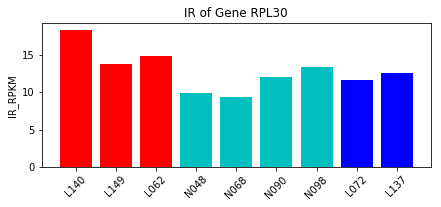

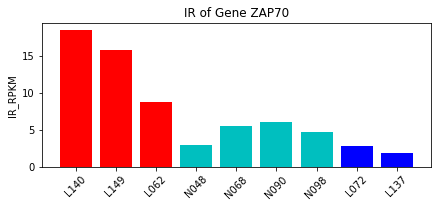

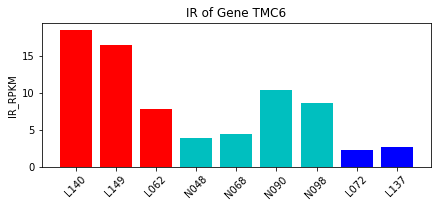

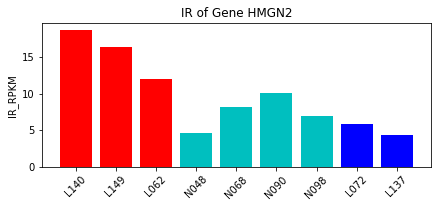

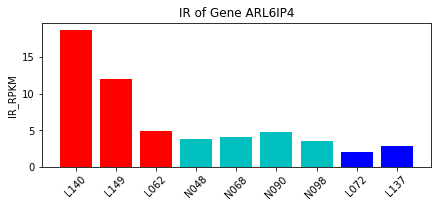

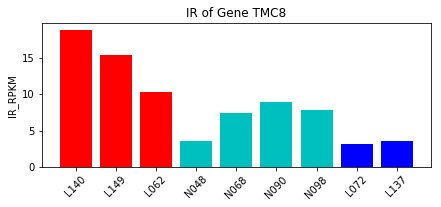

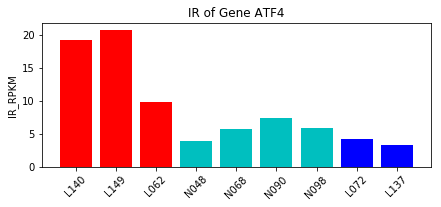

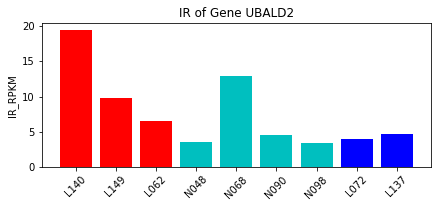

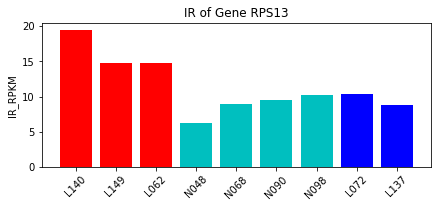

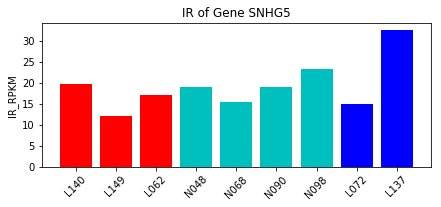

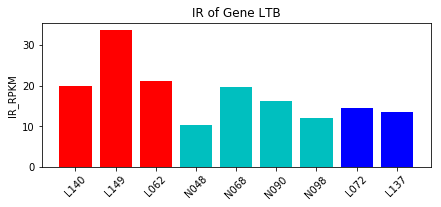

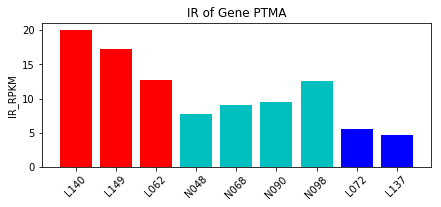

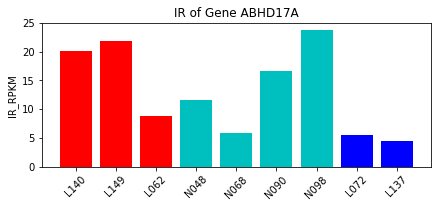

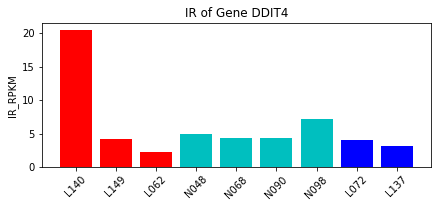

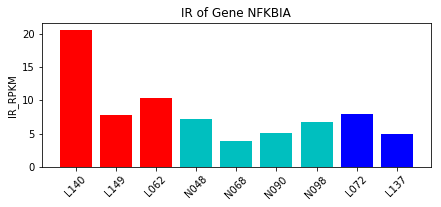

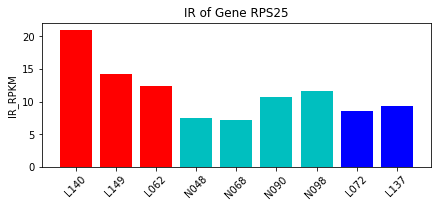

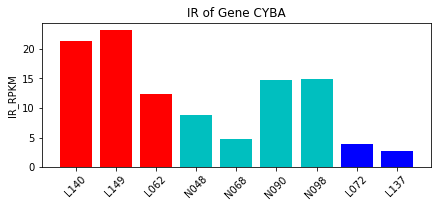

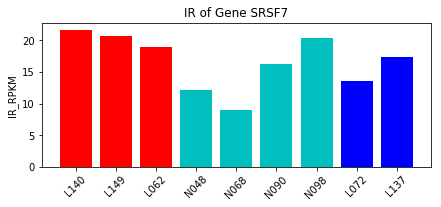

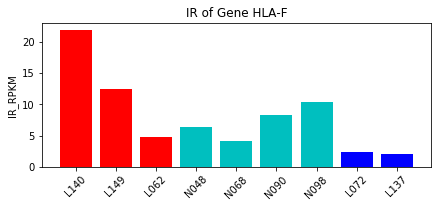

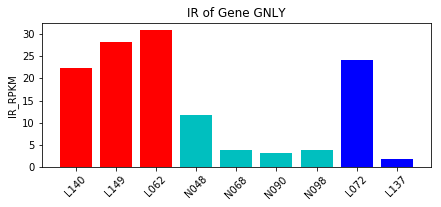

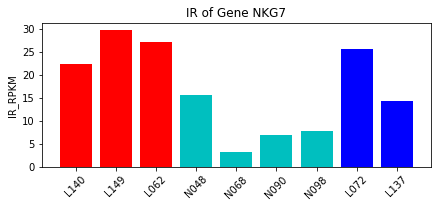

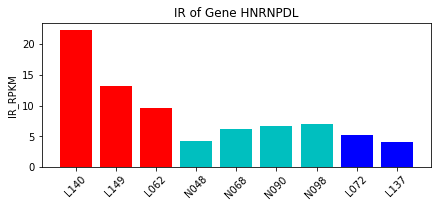

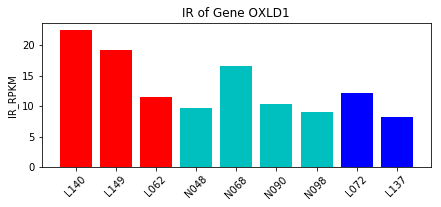

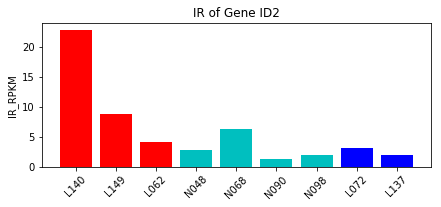

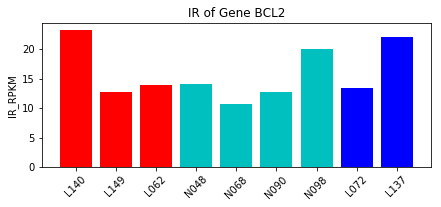

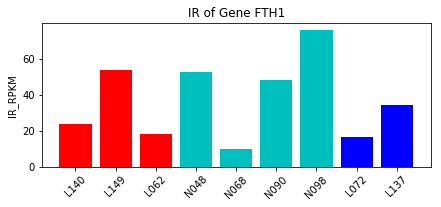

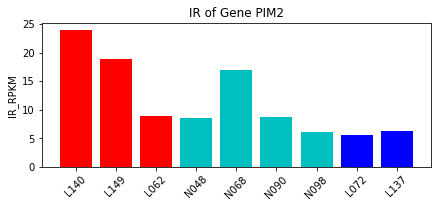

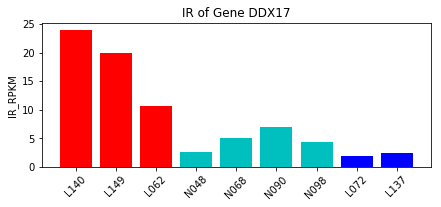

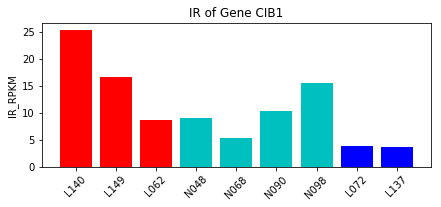

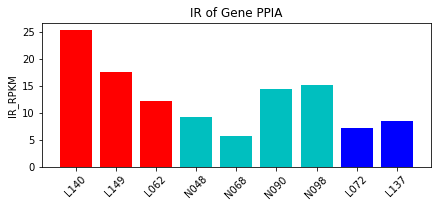

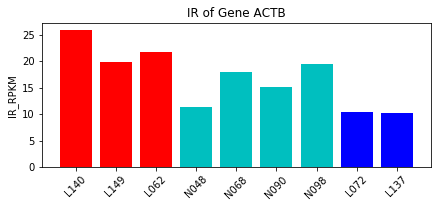

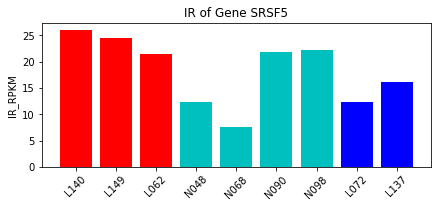

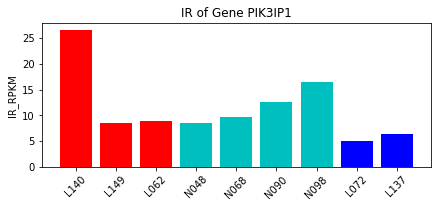

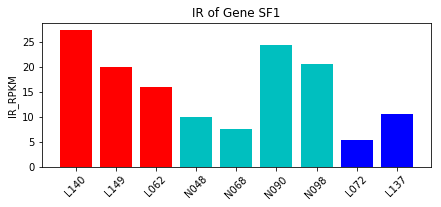

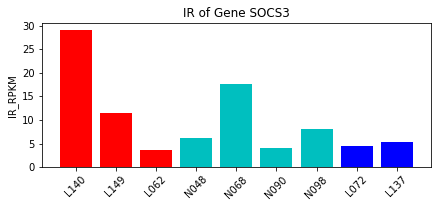

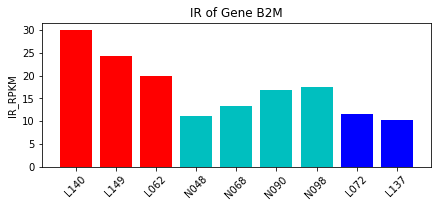

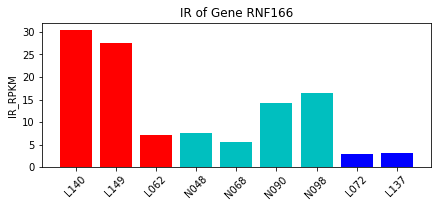

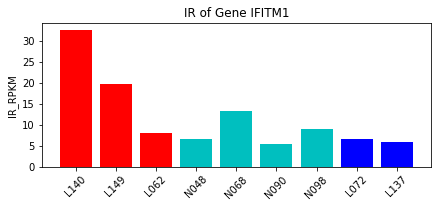

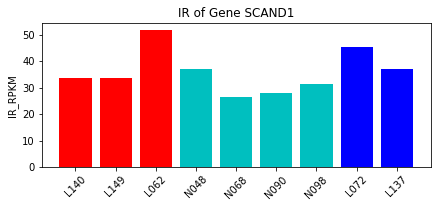

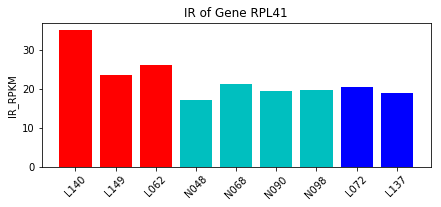

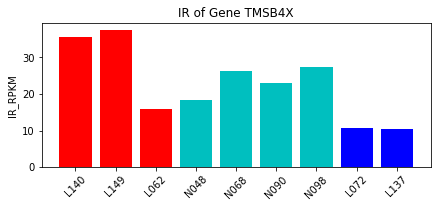

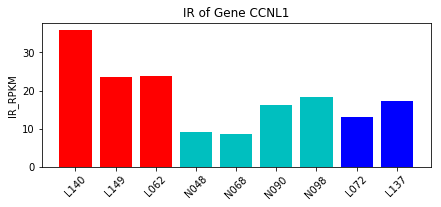

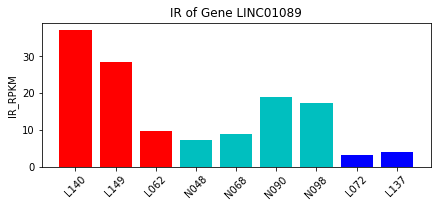

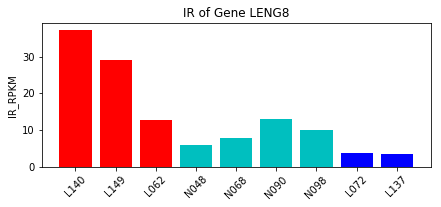

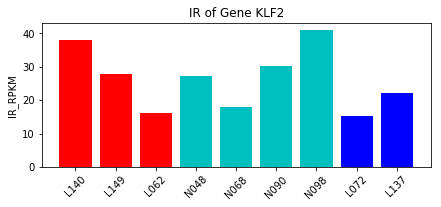

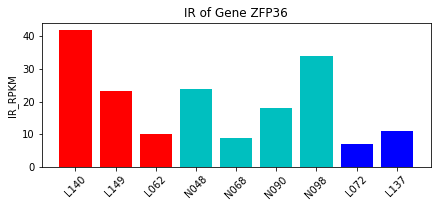

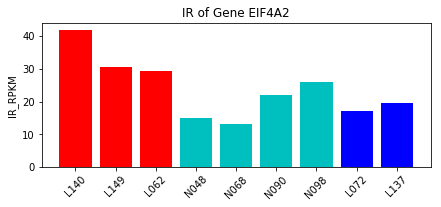

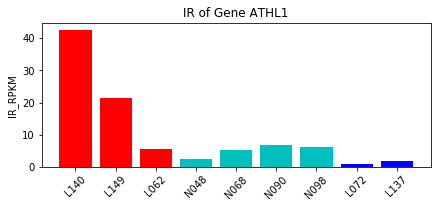

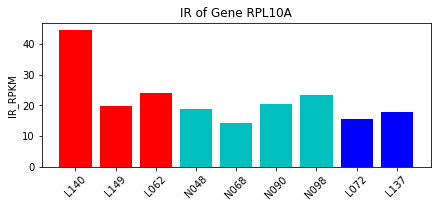

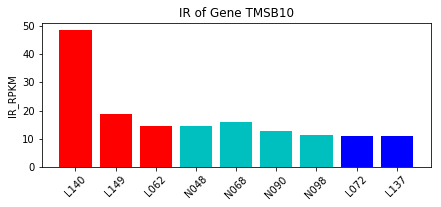

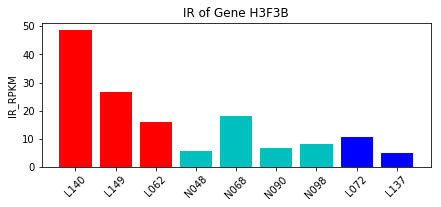

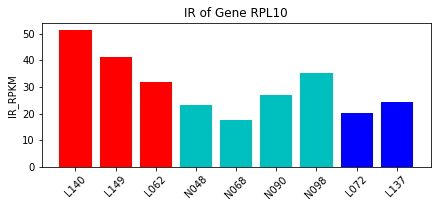

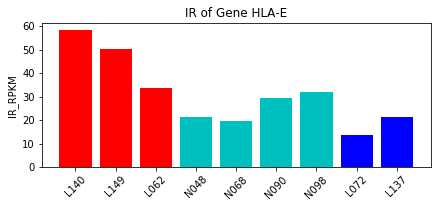

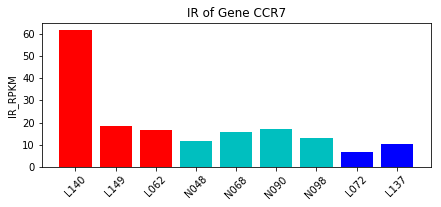

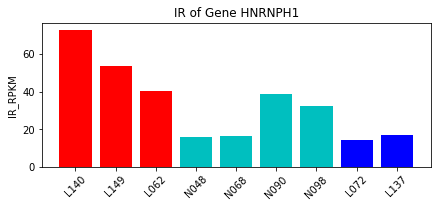

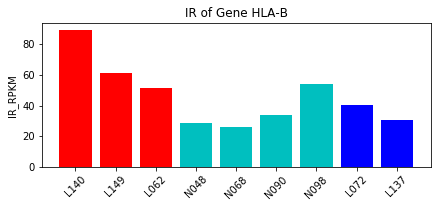

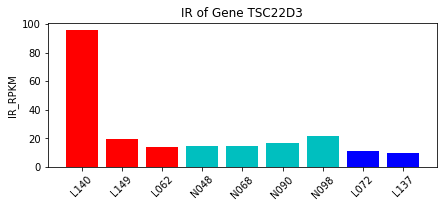

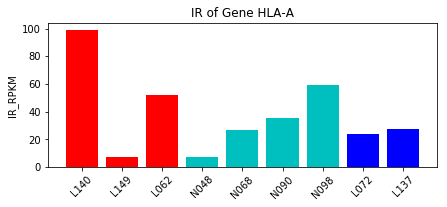

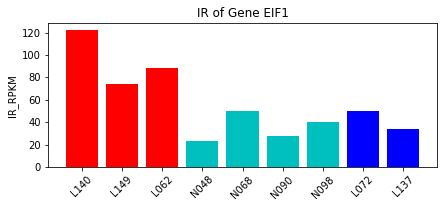

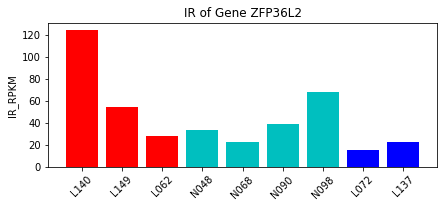

In [114]:
gene_ID_range = len(gene_ID_9)
x = [0,1,2,3,4,5,6,7,8]
colors_9 = []
colors_9.extend(['r']*3)
colors_9.extend(['c']*4)
colors_9.extend(['b']*2)

for i in range(0,gene_ID_range): 
    plt.bar(x, IRs_9[i], color = colors_9)
    plt.title('IR of Gene ' + gene_ID_9[i])
    plt.ylabel('IR_RPKM')
    plt.xticks(x, sample_ID_9, rotation = 45)
    plt.subplots_adjust(top = 0.6, bottom = 0.1, left = 0.1, right = 1.0)
    plt.savefig("./IR300_Union_9/IR300_Values_" + gene_ID_9[i] +".png", bbox_inches='tight', dpi=400)
    plt.show()

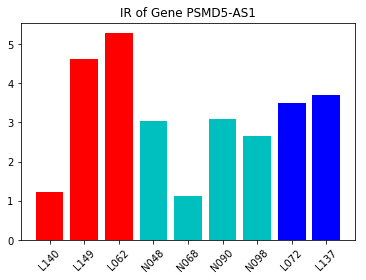

In [113]:
plt.bar(x0, IRs_9[2], color = colors_9)
plt.title('IR of Gene ' + gene_ID_9[2])
plt.xticks(x0, sample_ID_9, rotation = 45)
plt.show()

## Overlap  //  IRI

In [ ]:
# get top list of different samples
def top_list_IRI(data,i):
        return(data.sort_values('gene_IRI',ascending= False).index.tolist()[:i])
    
def multi_top_list_IRI(datasets,i):
    
    lists = []
    for a in datasets:
        lists.append(top_list_IRI(a, i))
    return (lists)

# get the overlap of top lists from different samples
def get_overlap(lists):
        ls=[set(l) for l in lists]
        fst=ls[0]
        for l in ls[1:]:
            fst.intersection_update(l)
        return (len(fst), fst)

#### Top 100 : L062/L140/L149 |  N048/N068/N090/N098 | L137/L072

In [ ]:
L062_IRI_100 = multi_top_list_IRI([L140_sorted,L062_sorted,L149_sorted],100)
L062_IRI_100_overlap = get_overlap(L062_IRI_100)[0]
print ('3L Top 100 IRI oevrlap: ',L062_IRI_100_overlap)

N048_IRI_100 = multi_top_list_IRI([N048_sorted,N068_sorted,N090_sorted,N098_sorted],100)
N048_IRI_100_overlap = get_overlap(N048_IRI_100)[0]
print ('4N Top 100 IRI oevrlap: ',N048_IRI_100_overlap)

L072_IRI_100 = multi_top_list_IRI([L072_sorted,L137_sorted],100)
L072_IRI_100_overlap = get_overlap(L072_IRI_100)[0]
print ('L072/L137 Top 100 IRI oevrlap: ',L072_IRI_100_overlap)

NL_IRI_100 = multi_top_list_IRI([L140_sorted,L062_sorted,L149_sorted,
                              N048_sorted,N068_sorted,N090_sorted,N098_sorted],100)
NL_IRI_100_overlap = get_overlap(NL_IRI_100)[0]
print ('3L/4N Top 100 IRI oevrlap: ',NL_IRI_100_overlap)

L072_N_IRI_100 = multi_top_list_IRI([L072_sorted,L137_sorted,
                              N048_sorted,N068_sorted,N090_sorted,N098_sorted],100)
L072_N_IRI_100_overlap = get_overlap(L072_N_IRI_100)[0]
print ('2L/4N Top 100 IRI oevrlap: ',L072_N_IRI_100_overlap)

LL_IRI_100 = multi_top_list_IRI([L140_sorted,L062_sorted,L149_sorted,
                              L072_sorted,L137_sorted],100)
LL_IRI_100_overlap = get_overlap(LL_IRI_100)[0]
print ('2L/3L Top 100 IRI oevrlap: ',LL_IRI_100_overlap)


In [ ]:
plt.figure(figsize=(13,13))

gs = GridSpec(3, 2)
ax1 = plt.subplot(gs[0,0])
venn3([set(top_list_IRI(L140_sorted,100)), set(top_list_IRI(L149_sorted,100)), set(top_list_IRI(L062_sorted,100))], 
      set_labels = ('L140', 'L149', 'L062'), ax=ax1)

ax2 = plt.subplot(gs[0,1])
img = mpimg.imread('IRI_100_4N.png')
plt.imshow(img)
plt.title(['N048/N068/N090/N098'])


ax3 = plt.subplot(gs[1,0])
venn2([set(top_list_IRI(L072_sorted,100)), set(top_list_IRI(L137_sorted,100))], 
      set_labels = ('L072', 'L137'), ax=ax3)

ax4 = plt.subplot(gs[1,1])
venn2(subsets = (16, 3, 16), set_labels = ('L062/L140/L149', '4N'), ax=ax4)

ax5 = plt.subplot(gs[2,0])
venn2(subsets = (30, 3, 16), set_labels = ('L072/L137', '4N'), ax=ax5)

ax6 = plt.subplot(gs[2,1])
venn2(subsets = (26, 12, 20), set_labels = ('L072/L137', '3L'), ax=ax6)

plt.suptitle("IRI Top 100 : L062/L140/L149 |  N048/N068/N090/N098 | L137/L072", size = 18)
make_ticklabels_invisible(plt.gcf())

plt.show()



#### Top 200 : L062/L140/L149 |  N048/N068/N090/N098 | L137/L072

In [ ]:
L062_IRI200 = multi_top_list_IRI([L140_sorted,L062_sorted,L149_sorted],200)
L062_IRI200_overlap = get_overlap(L062_IRI200)[0]
print ('3L Top 200 IRI overlap: ',L062_IRI200_overlap)

#-------

N048_IRI200 = multi_top_list_IRI([N048_sorted,N068_sorted,N090_sorted,N098_sorted],200)
N048_IRI200_overlap = get_overlap(N048_IRI200)[0]
print ('4N Top 200 IRI overlap: ',N048_IRI200_overlap)

#-------

L072_IRI200 = multi_top_list_IRI([L072_sorted,L137_sorted],200)
L072_IRI200_overlap = get_overlap(L072_IRI200)[0]
print ('L072/L137 Top 200 IRI overlap: ',L072_IRI200_overlap)

#-------

L074_IRI200 = multi_top_list_IRI([L074_sorted,L133_sorted,L115_sorted],200)
L074_IRI200_overlap = get_overlap(L074_IRI200)[0]
print ('L074/L133/L115 Top 200 IRI overlap: ',L074_IRI200_overlap)
print ('#-------------------------------------#')

#-----------------------------------------------------------------------------------------

NL_IRI200 = multi_top_list_IRI([L140_sorted,L062_sorted,L149_sorted,
                              N048_sorted,N068_sorted,N090_sorted,N098_sorted],200)
NL_IRI200_overlap = get_overlap(NL_IRI200)[0]
print ('3L/4N Top 200 IRI overlap: ',NL_IRI200_overlap)

#-------

LL_IRI200 = multi_top_list_IRI([L140_sorted,L062_sorted,L149_sorted,
                              L072_sorted,L137_sorted],200)
LL_IRI200_overlap = get_overlap(LL_IRI200)[0]
print ('3L/2L Top 200 IRI overlap: ',LL_IRI200_overlap)

#-------

LL_IRI200 = multi_top_list_IRI([L140_sorted,L062_sorted,L149_sorted,
                              L074_sorted,L133_sorted,L115_sorted],200)
LL_IRI200_overlap = get_overlap(LL_IRI200)[0]
print ('3L/3LL Top 200 IRI overlap: ',LL_IRI200_overlap)

#-------

L072_N_IRI200 = multi_top_list_IRI([L072_sorted,L137_sorted,
                              N048_sorted,N068_sorted,N090_sorted,N098_sorted],200)
L072_N_IRI200_overlap = get_overlap(L072_N_IRI200)[0]
print ('4N/2L Top 200 IRI overlap: ',L072_N_IRI200_overlap)

#-------

L072_N_IRI200 = multi_top_list_IRI([L074_sorted,L133_sorted,L115_sorted,
                              N048_sorted,N068_sorted,N090_sorted,N098_sorted],200)
L072_N_IRI200_overlap = get_overlap(L072_N_IRI200)[0]
print ('4N/3LL Top 200 IRI overlap: ',L072_N_IRI200_overlap)

#-------

LL_IRI200 = multi_top_list_IRI([L072_sorted,L137_sorted,
                           L074_sorted,L133_sorted,L115_sorted],200)
LL_IRI200_overlap = get_overlap(LL_IRI200)[0]
print ('2L/3LL Top 200 IRI overlap: ',LL_IRI200_overlap)



In [ ]:
plt.figure(figsize=(13,13))

gs = GridSpec(2, 2)
ax1 = plt.subplot(gs[0,0])
venn3([set(top_list_IRI(L140_sorted,200)), set(top_list_IRI(L149_sorted,200)), set(top_list_IRI(L062_sorted,200))], 
      set_labels = ('L140', 'L149', 'L062'), ax=ax1)

ax2 = plt.subplot(gs[0,1])
img = mpimg.imread('IRI_200_4N.png')
plt.imshow(img)
plt.title(['N048/N068/N090/N098'])


ax3 = plt.subplot(gs[1,0])
venn2([set(top_list_IRI(L072_sorted,200)), set(top_list_IRI(L137_sorted,200))], 
      set_labels = ('L072', 'L137'), ax=ax3)

ax4 = plt.subplot(gs[1,1])
venn3([set(top_list_IRI(L074_sorted,200)), set(top_list_IRI(L133_sorted,200)), set(top_list_IRI(L115_sorted,200))], 
      set_labels = ('L074', 'L133', 'L115'), ax=ax4)

plt.suptitle("IRI Top 200 overlap : L062/L140/L149 |  N048/N068/N090/N098 | L137/L072 | L074/L133/L115", size = 18)
make_ticklabels_invisible(plt.gcf())

plt.show()

In [ ]:
3L Top 200 IRI overlap:  64
4N Top 200 IRI overlap:  50
L072/L137 Top 200 IRI overlap:  92
L074/L133/L115 Top 200 IRI overlap:  59
#-------------------------------------#
3L/4N Top 200 IRI overlap:  37
3L/2L Top 200 IRI overlap:  42
3L/3LL Top 200 IRI overlap:  36
4N/2L Top 200 IRI overlap:  42
4N/3LL Top 200 IRI overlap:  30
2L/3LL Top 200 IRI overlap:  43

In [ ]:
plt.figure(figsize=(13,13))

gs = GridSpec(3, 2)

ax1 = plt.subplot(gs[0,0])
venn2(subsets = (27, 13, 37), set_labels = ('3L', '4N'), ax=ax1)

ax2 = plt.subplot(gs[0,1])
venn2(subsets = (22, 40, 42), set_labels = ('3L', 'L072/L137'), ax=ax2)

ax3 = plt.subplot(gs[1,0])
venn2(subsets = (28, 23, 36), set_labels = ('3L', 'L074/L133/L115'), ax=ax3)

ax4 = plt.subplot(gs[1,1])
venn2(subsets = (18, 50, 42), set_labels = ('4N', 'L072/L137'), ax=ax4)

ax5 = plt.subplot(gs[2,0])
venn2(subsets = (20, 29, 30), set_labels = ('4N', 'L074/L133/L115'), ax=ax5)

ax6 = plt.subplot(gs[2,1])
venn2(subsets = (49, 16, 43), set_labels = ('L072/L137', 'L074/L133/L115'), ax=ax6)

plt.suptitle("IRI Top 200 : 4-group-overlap's oevrlap", size = 18)
make_ticklabels_invisible(plt.gcf())

plt.show()





#### Top 300 : L062/L140/L149 |  N048/N068/N090/N098 | L137/L072

In [ ]:
L062_IRI_300 = multi_top_list_IRI([L140_sorted,L062_sorted,L149_sorted],300)
L062_IRI_300_overlap = get_overlap(L062_IRI_300)[0]
print ('3L Top 300 IRI oevrlap: ',L062_IRI_300_overlap)

N048_IRI_300 = multi_top_list_IRI([N048_sorted,N068_sorted,N090_sorted,N098_sorted],300)
N048_IRI_300_overlap = get_overlap(N048_IRI_300)[0]
print ('4N Top 300 IRI oevrlap: ',N048_IRI_300_overlap)

L072_IRI_300 = multi_top_list_IRI([L072_sorted,L137_sorted],300)
L072_IRI_300_overlap = get_overlap(L072_IRI_300)[0]
print ('L072/L137 Top 300 IRI oevrlap: ',L072_IRI_300_overlap)

NL_IRI_300 = multi_top_list_IRI([L140_sorted,L062_sorted,L149_sorted,
                              N048_sorted,N068_sorted,N090_sorted,N098_sorted],300)
NL_IRI_300_overlap = get_overlap(NL_IRI_300)[0]
print ('3L/4N Top 300 IRI oevrlap: ',NL_IRI_300_overlap)

L072_N_IRI_300 = multi_top_list_IRI([L072_sorted,L137_sorted,
                              N048_sorted,N068_sorted,N090_sorted,N098_sorted],300)
L072_N_IRI_300_overlap = get_overlap(L072_N_IRI_300)[0]
print ('2L/4N Top 300 IRI oevrlap: ',L072_N_IRI_300_overlap)

LL_IRI_300 = multi_top_list_IRI([L140_sorted,L062_sorted,L149_sorted,
                              L072_sorted,L137_sorted],300)
LL_IRI_300_overlap = get_overlap(LL_IRI_300)[0]
print ('2L/3L Top 300 IRI oevrlap: ',LL_IRI_300_overlap)



In [ ]:
plt.figure(figsize=(13,13))

gs = GridSpec(3, 2)
ax1 = plt.subplot(gs[0,0])
venn3([set(top_list_IRI(L140_sorted,300)), set(top_list_IRI(L149_sorted,300)), set(top_list_IRI(L062_sorted,300))], 
      set_labels = ('L140', 'L149', 'L062'), ax=ax1)

ax2 = plt.subplot(gs[0,1])
img = mpimg.imread('IRI_300_4N.png')
plt.imshow(img)
plt.title(['N048/N068/N090/N098'])


ax3 = plt.subplot(gs[1,0])
venn2([set(top_list_IRI(L072_sorted,300)), set(top_list_IRI(L137_sorted,300))], 
      set_labels = ('L072', 'L137'), ax=ax3)

ax4 = plt.subplot(gs[1,1])
venn2(subsets = (41, 25, 59), set_labels = ('L062/L140/L149', '4N'), ax=ax4)

ax5 = plt.subplot(gs[2,0])
venn2(subsets = (94, 18, 66), set_labels = ('L072/L137', '4N'), ax=ax5)

ax6 = plt.subplot(gs[2,1])
venn2(subsets = (91, 31, 69), set_labels = ('L072/L137', '3L'), ax=ax6)

plt.suptitle("IRI Top 300 : L062/L140/L149 |  N048/N068/N090/N098 | L137/L072", size = 18)
make_ticklabels_invisible(plt.gcf())

plt.show()


## Overlap  //  Top 300 Clustermap

In [ ]:
data_all_gene_norm = pd.read_csv('All_gene_NL_Norm.csv')
data_all_gene_norm.head(2)

#### GE | IRI | Top 300 | 3L/4N/L072/L137

In [ ]:
#get normalized data frame
data_all_gene_NLL = data_all_gene_norm[['tracking_id','L140', 'L149','LL062',
                                        'N048','N068','N090','N098','L072','L137']]
data_all_gene_NLL.head(2)

#get union gene list
L_N_L_list = top_list_IRI(L140_sorted,300)+top_list_IRI(L149_sorted,300)+top_list_IRI(L062_sorted,300)+top_list_IRI(N048_sorted,300)+top_list_IRI(N068_sorted,300)+top_list_IRI(N090_sorted,300)+top_list_IRI(N098_sorted,300)+top_list_IRI(L137_sorted,300)+top_list_IRI(L072_sorted,300)
L_N_L_list = set(L_N_L_list)
print('3L/4N/L072/L137 union gene list length: ', len(L_N_L_list))

#get dataframe used in clustermap
data_NLL = data_all_gene_NLL.loc[data_all_gene_NLL['tracking_id'] == 'SERHL']
for i in L_N_L_list:
    a = data_all_gene_NLL.loc[data_all_gene_NLL['tracking_id'] == i]
    data_NLL = data_NLL.append(a)
data_NLL = data_NLL.set_index('tracking_id')
data_NLL.head(2)

In [ ]:
import seaborn as sns; sns.set(color_codes=True)
groups = []
groups.extend(['Control']*4)
groups.extend(['Inacive']*4)
groups.extend(['Active']*10)
lut = dict(zip(set(groups), "rbg"))
print (lut)
col_colors = [lut[x] for x in groups]

In [ ]:
g = sns.clustermap(data_NLL, col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('data_NLL_300_IRI_cluster_map')

#### GE | IRI | Top 300 | All samples

In [ ]:
#get union gene list
All_list = (top_list_IRI(L140_sorted,300)+top_list_IRI(L149_sorted,300)+top_list_IRI(L062_sorted,300)
              +top_list_IRI(N048_sorted,300)+top_list_IRI(N068_sorted,300)+top_list_IRI(N090_sorted,300)
              +top_list_IRI(N098_sorted,300)+top_list_IRI(L137_sorted,300)+top_list_IRI(L072_sorted,300)
              +top_list_IRI(L027_sorted,300)+top_list_IRI(L074_sorted,300)+top_list_IRI(L005_sorted,300)
              +top_list_IRI(L115_sorted,300)+top_list_IRI(L102_sorted,300)+top_list_IRI(L133_sorted,300)
              +top_list_IRI(L031_sorted,300)+top_list_IRI(L078_sorted,300))
All_list = set(All_list)
print('All union gene list length: ', len(All_list))

#get dataframe used in clustermap
data_all = data_all_gene_norm.loc[data_all_gene_norm['tracking_id'] == 'SERHL']
for i in All_list:
    a = data_all_gene_norm.loc[data_all_gene_norm['tracking_id'] == i]
    data_all = data_all.append(a)
data_all = data_all.set_index('tracking_id')
data_all.head(2)

In [ ]:
g = sns.clustermap(data_all, col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('All_300_IRI_cluster_map')

#### GE | IRI | Top 300 | 4N/L37/L072(Besides overlap part)

In [ ]:
#get normalized data frame
data_all_gene_NL = data_all_gene_norm[['tracking_id','N048','N068','N090','N098','L072','L137']]
data_all_gene_NL.head(2)

#get union gene list
N_L_list = top_list_IRI(N048_sorted,300)+top_list_IRI(N068_sorted,300)+top_list_IRI(N090_sorted,300)+top_list_IRI(N098_sorted,300)+top_list_IRI(L137_sorted,300)+top_list_IRI(L072_sorted,300)
L072_N_IRI_300 = multi_top_list_IRI([L072_sorted,L137_sorted,
                              N048_sorted,N068_sorted,N090_sorted,N098_sorted],300)
oevrlap_list = get_overlap(L072_N_IRI_300)[1]
N_L_list = set(N_L_list)-set(oevrlap_list)
print('3L/4N/L072/L137 union gene list besides oevrlap length: ', len(N_L_list))

#get dataframe used in clustermap
data_NL = data_all_gene_NL.loc[data_all_gene_NL['tracking_id'] == 'A2M']
for i in N_L_list:
    a = data_all_gene_NL.loc[data_all_gene_NL['tracking_id'] == i]
    data_NL = data_NL.append(a)
data_NL = data_NL.set_index('tracking_id')
data_NL.head(2)

In [ ]:
g = sns.clustermap(data_NL, col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('N4L2_300_IRI_cluster_map')

#### GE | IR | Top 300 | 3L/4N/L072/L137

In [ ]:
#get normalized data frame
data_all_gene_NLL = data_all_gene_norm[['tracking_id','L140', 'L149','LL062',
                                        'N048','N068','N090','N098','L072','L137']]
data_all_gene_NLL.head(2)

#get union gene list
L_N_L_list = top_list(L140_sorted,100)+top_list(L149_sorted,100)+top_list(L062_sorted,100)+top_list(N048_sorted,100)+top_list(N068_sorted,100)+top_list(N090_sorted,100)+top_list(N098_sorted,100)+top_list(L137_sorted,100)+top_list(L072_sorted,100)
L_N_L_list = set(L_N_L_list)
print('3L/4N/L072/L137 union gene list length: ', len(L_N_L_list))

#get dataframe used in clustermap
data_NLL = data_all_gene_NLL.loc[data_all_gene_NLL['tracking_id'] == 'SERHL']
for i in L_N_L_list:
    a = data_all_gene_NLL.loc[data_all_gene_NLL['tracking_id'] == i]
    data_NLL = data_NLL.append(a)
data_NLL = data_NLL.set_index('tracking_id')
data_NLL.head(2)

In [ ]:
g = sns.clustermap(data_NLL, col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('NLL_100_IR_cluster_map')

#### GE | IR | Top 300 | All samples

In [ ]:
#get union gene list
All_list = (top_list(L140_sorted,100)+top_list(L149_sorted,100)+top_list(L062_sorted,100)
              +top_list(N048_sorted,100)+top_list(N068_sorted,100)+top_list(N090_sorted,100)
              +top_list(N098_sorted,100)+top_list(L137_sorted,100)+top_list(L072_sorted,100)
              +top_list(L027_sorted,100)+top_list(L074_sorted,100)+top_list(L005_sorted,100)
              +top_list(L115_sorted,100)+top_list(L102_sorted,100)+top_list(L133_sorted,100)
              +top_list(L031_sorted,100)+top_list(L078_sorted,100))
All_list = set(All_list)
print('All union gene list length: ', len(All_list))

#get dataframe used in clustermap
data_all = data_all_gene_norm.loc[data_all_gene_norm['tracking_id'] == 'SERHL']
for i in All_list:
    a = data_all_gene_norm.loc[data_all_gene_norm['tracking_id'] == i]
    data_all = data_all.append(a)
data_all = data_all.set_index('tracking_id')
data_all.head(2)

In [ ]:
g = sns.clustermap(data_all, col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('All_100_IR_cluster_map')

## Overlap  //  Overlap List

#### 2L VS 3L | 4N overlap list , IRI

In [ ]:
L072_N_IRI_300 = multi_top_list_IRI([L072_sorted,L137_sorted,
                              N048_sorted,N068_sorted,N090_sorted,N098_sorted],300)
L072_N_IRI_300_overlap_list = get_overlap(L072_N_IRI_300)[1]
print ('2L/4N Top 300 IRI oevrlap: ',len(L072_N_IRI_300_overlap_list))
print(list(L072_N_IRI_300_overlap_list))


In [ ]:
a = list(L072_N_IRI_300_overlap_list)
b = list(LL_IRI_300_overlap_list)
a.append(b)

In [ ]:
LL_IRI_300 = multi_top_list_IRI([L140_sorted,L062_sorted,L149_sorted,
                              L072_sorted,L137_sorted],300)
LL_IRI_300_overlap_list = get_overlap(LL_IRI_300)[1]
print ('2L/3L Top 300 IRI oevrlap: ',len(LL_IRI_300_overlap_list))
print(list(LL_IRI_300_overlap_list))


#### 2L VS 3L | 4N overlap list , IR

In [ ]:
L072_N_IRI_300 = multi_top_list([L072_sorted,L137_sorted,
                              N048_sorted,N068_sorted,N090_sorted,N098_sorted],300)
L072_N_IRI_300_overlap_list = get_overlap(L072_N_IRI_300)[1]
print ('2L/4N Top 300 IR oevrlap: ',len(L072_N_IRI_300_overlap_list))
print(L072_N_IRI_300_overlap_list)

In [ ]:
LL_IRI_300 = multi_top_list([L140_sorted,L062_sorted,L149_sorted,
                              L072_sorted,L137_sorted],300)
LL_IRI_300_overlap_list = get_overlap(LL_IRI_300)[1]
print ('2L/3L Top 300 IR oevrlap: ',len(LL_IRI_300_overlap_list))
print(LL_IRI_300_overlap_list)


## Overlap  //  Overlap Table 300

In [ ]:
#L140
data_list = [[L140_sorted,L149_sorted],[L140_sorted,L062_sorted],
             [L140_sorted,N048_sorted],[L140_sorted,N068_sorted],[L140_sorted,N090_sorted],[L140_sorted,N098_sorted],
             [L140_sorted,L072_sorted],[L140_sorted,L137_sorted],
             [L140_sorted,L074_sorted],[L140_sorted,L078_sorted],[L140_sorted,L005_sorted],[L140_sorted,L031_sorted],
             [L140_sorted,L133_sorted],[L140_sorted,L027_sorted],[L140_sorted,L102_sorted],[L140_sorted,L115_sorted]]

for i in data_list:
    a = multi_top_list(i,300)
    b = get_overlap(a)[0]
    print (b)
    
print('-------')

for i in data_list:
    a = multi_top_list_IRI(i,300)
    b = get_overlap_IRI(a)[0]
    print (b)


In [ ]:
#L149
data_list = [[L149_sorted,L062_sorted],
             [L149_sorted,N048_sorted],[L149_sorted,N068_sorted],[L149_sorted,N090_sorted],[L149_sorted,N098_sorted],
             [L149_sorted,L072_sorted],[L149_sorted,L137_sorted],
             [L149_sorted,L074_sorted],[L149_sorted,L078_sorted],[L149_sorted,L005_sorted],[L149_sorted,L031_sorted],
             [L149_sorted,L133_sorted],[L149_sorted,L027_sorted],[L149_sorted,L102_sorted],[L149_sorted,L115_sorted]]

for i in data_list:
    a = multi_top_list(i,300)
    b = get_overlap(a)[0]
    print (b)
    
print('-------')

for i in data_list:
    a = multi_top_list_IRI(i,300)
    b = get_overlap_IRI(a)[0]
    print (b)
    

In [ ]:
#L062
data_list = [[L062_sorted,N048_sorted],[L062_sorted,N068_sorted],[L062_sorted,N090_sorted],[L062_sorted,N098_sorted],
             [L062_sorted,L072_sorted],[L062_sorted,L137_sorted],
             [L062_sorted,L074_sorted],[L062_sorted,L078_sorted],[L062_sorted,L005_sorted],[L062_sorted,L031_sorted],
             [L062_sorted,L133_sorted],[L062_sorted,L027_sorted],[L062_sorted,L102_sorted],[L062_sorted,L115_sorted]]

for i in data_list:
    a = multi_top_list(i,300)
    b = get_overlap(a)[0]
    print (b)
    
print('-------')

for i in data_list:
    a = multi_top_list_IRI(i,300)
    b = get_overlap_IRI(a)[0]
    print (b)
    

In [ ]:
#N048
data_list =  [[N048_sorted,N068_sorted],[N048_sorted,N090_sorted],[N048_sorted,N098_sorted],
             [N048_sorted,L072_sorted],[N048_sorted,L137_sorted],
             [N048_sorted,L074_sorted],[N048_sorted,L078_sorted],[N048_sorted,L005_sorted],[N048_sorted,L031_sorted],
             [N048_sorted,L133_sorted],[N048_sorted,L027_sorted],[N048_sorted,L102_sorted],[N048_sorted,L115_sorted]]

for i in data_list:
    a = multi_top_list(i,300)
    b = get_overlap(a)[0]
    print (b)
    
print('-------')

for i in data_list:
    a = multi_top_list_IRI(i,300)
    b = get_overlap_IRI(a)[0]
    print (b)
    

In [ ]:
#N068
data_list =  [[N068_sorted,N090_sorted],[N068_sorted,N098_sorted],
             [N068_sorted,L072_sorted],[N068_sorted,L137_sorted],
             [N068_sorted,L074_sorted],[N068_sorted,L078_sorted],[N068_sorted,L005_sorted],[N068_sorted,L031_sorted],
             [N068_sorted,L133_sorted],[N068_sorted,L027_sorted],[N068_sorted,L102_sorted],[N068_sorted,L115_sorted]]

for i in data_list:
    a = multi_top_list(i,300)
    b = get_overlap(a)[0]
    print (b)
    
print('-------')

for i in data_list:
    a = multi_top_list_IRI(i,300)
    b = get_overlap_IRI(a)[0]
    print (b)
    

In [ ]:
#N090
data_list =  [[N090_sorted,N098_sorted],
             [N090_sorted,L072_sorted],[N090_sorted,L137_sorted],
             [N090_sorted,L074_sorted],[N090_sorted,L078_sorted],[N090_sorted,L005_sorted],[N090_sorted,L031_sorted],
             [N090_sorted,L133_sorted],[N090_sorted,L027_sorted],[N090_sorted,L102_sorted],[N090_sorted,L115_sorted]]

for i in data_list:
    a = multi_top_list(i,300)
    b = get_overlap(a)[0]
    print (b)
    
print('-------')

for i in data_list:
    a = multi_top_list_IRI(i,300)
    b = get_overlap_IRI(a)[0]
    print (b)
    

In [ ]:
#N098
data_list =  [[N098_sorted,L072_sorted],[N098_sorted,L137_sorted],
             [N098_sorted,L074_sorted],[N098_sorted,L078_sorted],[N098_sorted,L005_sorted],[N098_sorted,L031_sorted],
             [N098_sorted,L133_sorted],[N098_sorted,L027_sorted],[N098_sorted,L102_sorted],[N098_sorted,L115_sorted]]

for i in data_list:
    a = multi_top_list(i,300)
    b = get_overlap(a)[0]
    print (b)
    
print('-------')

for i in data_list:
    a = multi_top_list_IRI(i,300)
    b = get_overlap_IRI(a)[0]
    print (b)
    

In [ ]:
#L072
data_list =  [[L072_sorted,L137_sorted],
             [L072_sorted,L074_sorted],[L072_sorted,L078_sorted],[L072_sorted,L005_sorted],[L072_sorted,L031_sorted],
             [L072_sorted,L133_sorted],[L072_sorted,L027_sorted],[L072_sorted,L102_sorted],[L072_sorted,L115_sorted]]

for i in data_list:
    a = multi_top_list(i,300)
    b = get_overlap(a)[0]
    print (b)
    
print('-------')

for i in data_list:
    a = multi_top_list_IRI(i,300)
    b = get_overlap_IRI(a)[0]
    print (b)
    

In [ ]:
#L137
data_list =  [[L137_sorted,L074_sorted],[L137_sorted,L078_sorted],[L137_sorted,L005_sorted],[L137_sorted,L031_sorted],
             [L137_sorted,L133_sorted],[L137_sorted,L027_sorted],[L137_sorted,L102_sorted],[L137_sorted,L115_sorted]]

for i in data_list:
    a = multi_top_list(i,300)
    b = get_overlap(a)[0]
    print (b)
    
print('-------')

for i in data_list:
    a = multi_top_list_IRI(i,300)
    b = get_overlap_IRI(a)[0]
    print (b)
    

In [ ]:
#L074
data_list =  [[L074_sorted,L078_sorted],[L074_sorted,L005_sorted],[L074_sorted,L031_sorted],
             [L074_sorted,L133_sorted],[L074_sorted,L027_sorted],[L074_sorted,L102_sorted],[L074_sorted,L115_sorted]]

for i in data_list:
    a = multi_top_list(i,300)
    b = get_overlap(a)[0]
    print (b)
    
print('-------')

for i in data_list:
    a = multi_top_list_IRI(i,300)
    b = get_overlap_IRI(a)[0]
    print (b)
    

In [ ]:
#L078
data_list =  [[L078_sorted,L005_sorted],[L078_sorted,L031_sorted],
             [L078_sorted,L133_sorted],[L078_sorted,L027_sorted],[L078_sorted,L102_sorted],[L078_sorted,L115_sorted]]

for i in data_list:
    a = multi_top_list(i,300)
    b = get_overlap(a)[0]
    print (b)
    
print('-------')

for i in data_list:
    a = multi_top_list_IRI(i,300)
    b = get_overlap_IRI(a)[0]
    print (b)
    

In [ ]:
#L005
data_list =  [[L005_sorted,L031_sorted],
             [L005_sorted,L133_sorted],[L005_sorted,L027_sorted],[L005_sorted,L102_sorted],[L005_sorted,L115_sorted]]

for i in data_list:
    a = multi_top_list(i,300)
    b = get_overlap(a)[0]
    print (b)
    
print('-------')

for i in data_list:
    a = multi_top_list_IRI(i,300)
    b = get_overlap_IRI(a)[0]
    print (b)
    

In [ ]:
#L031
data_list =  [[L031_sorted,L133_sorted],[L031_sorted,L027_sorted],[L031_sorted,L102_sorted],[L031_sorted,L115_sorted]]

for i in data_list:
    a = multi_top_list(i,300)
    b = get_overlap(a)[0]
    print (b)
    
print('-------')

for i in data_list:
    a = multi_top_list_IRI(i,300)
    b = get_overlap_IRI(a)[0]
    print (b)
    

In [ ]:
#L133
data_list =  [[L133_sorted,L027_sorted],[L133_sorted,L102_sorted],[L133_sorted,L115_sorted]]

for i in data_list:
    a = multi_top_list(i,300)
    b = get_overlap(a)[0]
    print (b)
    
print('-------')

for i in data_list:
    a = multi_top_list_IRI(i,300)
    b = get_overlap_IRI(a)[0]
    print (b)
    

In [ ]:
#L027
data_list =  [[L027_sorted,L102_sorted],[L027_sorted,L115_sorted]]

for i in data_list:
    a = multi_top_list(i,300)
    b = get_overlap(a)[0]
    print (b)
    
print('-------')

for i in data_list:
    a = multi_top_list_IRI(i,300)
    b = get_overlap_IRI(a)[0]
    print (b)
    

In [ ]:
#L102
data_list =  [[L102_sorted,L115_sorted]]

for i in data_list:
    a = multi_top_list(i,300)
    b = get_overlap(a)[0]
    print (b)
    
print('-------')

for i in data_list:
    a = multi_top_list_IRI(i,300)
    b = get_overlap_IRI(a)[0]
    print (b)
    

## RPKM Relationship Between Control and Active

In [ ]:
def read_file(filename):
    data = pd.read_table(filename)
    data = data[['gene_id','gene_CIR_read_count','gene_CER_read_count',
                           'gene_CIR_RPKM','gene_CER_RPKM','gene_IRI']]
    data = data.sort_values('gene_CIR_RPKM',ascending= False).set_index('gene_id').replace([np.inf, -np.inf], np.nan).dropna()
    data = data[data.gene_IRI != 0]
    data = data[data.gene_IRI < 1]
    data = data[data.gene_CER_RPKM > 1]
    data = pd.DataFrame(data)
    return (data)
     
L140_sorted = read_file('L140_sorted.quant.IRI.genes.csv')
L149_sorted = read_file('L149_sorted.quant.IRI.genes.csv')
L062_sorted = read_file('L062_sorted.quant.IRI.genes.csv')
N048_sorted = read_file('N048_sorted.quant.IRI.genes.csv')
N068_sorted = read_file('N068_sorted.quant.IRI.genes.csv')
N090_sorted = read_file('N090_sorted.quant.IRI.genes.csv')
N098_sorted = read_file('N098_sorted.quant.IRI.genes.csv')
L005_sorted = read_file('L005_sorted.quant.IRI.genes.csv')
L027_sorted = read_file('L027_sorted.quant.IRI.genes.csv')
L031_sorted = read_file('L031_sorted.quant.IRI.genes.csv')
L072_sorted = read_file('L072_sorted.quant.IRI.genes.csv')
L074_sorted = read_file('L074_sorted.quant.IRI.genes.csv')
L078_sorted = read_file('L078_sorted.quant.IRI.genes.csv')
L102_sorted = read_file('L102_sorted.quant.IRI.genes.csv')
L115_sorted = read_file('L115_sorted.quant.IRI.genes.csv')
L133_sorted = read_file('L133_sorted.quant.IRI.genes.csv')
L137_sorted = read_file('L137_sorted.quant.IRI.genes.csv')

In [ ]:
L140 = L140_sorted.index.tolist()
L149 = L149_sorted.index.tolist()
L062 = L062_sorted.index.tolist()

N048 = N048_sorted.index.tolist()
N068 = N068_sorted.index.tolist()
N090 = N090_sorted.index.tolist()
N098 = N098_sorted.index.tolist()

L005 = L005_sorted.index.tolist()
L072 = L072_sorted.index.tolist()
L074 = L074_sorted.index.tolist()
L078 = L078_sorted.index.tolist()
L115 = L115_sorted.index.tolist()
L031 = L031_sorted.index.tolist()
L133 = L133_sorted.index.tolist()
L027 = L027_sorted.index.tolist()
L102 = L102_sorted.index.tolist()
L137 = L137_sorted.index.tolist()

In [ ]:
NL_Lists = []
for i in L140:
    if i in L149:
        if i in L062:
            if i in N048:
                if i in N068:
                    if i in N090:
                        if i in N098:
                            if i in L005:
                                if i in L027:
                                    if i in L072:
                                        if i in L074:
                                            if i in L078:
                                                if i in L031:
                                                    if i in L133:
                                                        if i in L137:
                                                            if i in L115:
                                                                if i in L102:
                                                                    NL_Lists.append(i)
len(NL_Lists)                                                                  

In [ ]:
L140_data = L140_sorted.loc[L140_sorted.index  == 'EIF1']
for i in NL_Lists:
    a = L140_sorted.loc[L140_sorted.index  == i]
    L140_data = L140_data.append(a)
#L140_data = L140_data.drop_duplicates(['gene_CER_RPKM'])
    
L149_data = L149_sorted.loc[L149_sorted.index  == 'EIF1']
for i in NL_Lists:
    a = L149_sorted.loc[L149_sorted.index  == i]
    L149_data = L149_data.append(a)
#L149_data = L149_data.drop_duplicates(['gene_CER_RPKM'])
    
L062_data = L062_sorted.loc[L062_sorted.index  == 'EIF1']
for i in NL_Lists:
    a = L062_sorted.loc[L062_sorted.index  == i]
    L062_data = L062_data.append(a)
#L062_data = L062_data.drop_duplicates(['gene_CER_RPKM'])

#-----------------------    

N048_data = N048_sorted.loc[N048_sorted.index  == 'EIF1']
for i in NL_Lists:
    a = N048_sorted.loc[N048_sorted.index  == i]
    N048_data = N048_data.append(a)
#N048_data = N048_data.drop_duplicates(['gene_CER_RPKM'])
    
N068_data = N068_sorted.loc[N068_sorted.index  == 'EIF1']
for i in NL_Lists:
    a = N068_sorted.loc[N068_sorted.index  == i]
    N068_data = N068_data.append(a)
#N068_data = N068_data.drop_duplicates(['gene_CER_RPKM'])
    
N090_data = N090_sorted.loc[N090_sorted.index  == 'EIF1']
for i in NL_Lists:
    a = N090_sorted.loc[N090_sorted.index  == i]
    N090_data =N090_data.append(a)
#N090_data = N090_data.drop_duplicates(['gene_CER_RPKM'])
    
N098_data = N098_sorted.loc[N098_sorted.index  == 'EIF1']
for i in NL_Lists:
    a = N098_sorted.loc[N098_sorted.index  == i]
    N098_data = N098_data.append(a)
#N098_data = N098_data.drop_duplicates(['gene_CER_RPKM'])

#-----------------------

L005_data = L005_sorted.loc[L005_sorted.index  == 'EIF1']
for i in NL_Lists:
    a = L005_sorted.loc[L005_sorted.index  == i]
    L005_data = L005_data.append(a)
#L005_data = L005_data.drop_duplicates(['gene_CER_RPKM'])
    
L072_data = L072_sorted.loc[L072_sorted.index  == 'EIF1']
for i in NL_Lists:
    a = L072_sorted.loc[L072_sorted.index  == i]
    L072_data = L072_data.append(a)
#L072_data = L072_data.drop_duplicates(['gene_CER_RPKM'])
    
L074_data = L074_sorted.loc[L074_sorted.index  == 'EIF1']
for i in NL_Lists:
    a = L074_sorted.loc[L074_sorted.index  == i]
    L074_data = L074_data.append(a)
#L074_data = L074_data.drop_duplicates(['gene_CER_RPKM'])

L078_data = L078_sorted.loc[L078_sorted.index  == 'EIF1']
for i in NL_Lists:
    a = L078_sorted.loc[L078_sorted.index  == i]
    L078_data = L078_data.append(a)
#L078_data = L078_data.drop_duplicates(['gene_CER_RPKM'])
    
L115_data = L115_sorted.loc[L115_sorted.index  == 'EIF1']
for i in NL_Lists:
    a = L115_sorted.loc[L115_sorted.index  == i]
    L115_data = L115_data.append(a)
#L115_data = L115_data.drop_duplicates(['gene_CER_RPKM'])
    
L031_data = L031_sorted.loc[L031_sorted.index  == 'EIF1']
for i in NL_Lists:
    a = L031_sorted.loc[L031_sorted.index  == i]
    L031_data = L031_data.append(a)
#L031_data = L031_data.drop_duplicates(['gene_CER_RPKM'])

L133_data = L133_sorted.loc[L133_sorted.index  == 'EIF1']
for i in NL_Lists:
    a = L133_sorted.loc[L133_sorted.index  == i]
    L133_data = L133_data.append(a)
#L133_data = L133_data.drop_duplicates(['gene_CER_RPKM'])
    
L027_data = L027_sorted.loc[L027_sorted.index  == 'EIF1']
for i in NL_Lists:
    a = L027_sorted.loc[L027_sorted.index  == i]
    L027_data = L027_data.append(a)
#L027_data = L027_data.drop_duplicates(['gene_CER_RPKM'])
    
L102_data = L102_sorted.loc[L102_sorted.index  == 'EIF1']
for i in NL_Lists:
    a = L102_sorted.loc[L102_sorted.index  == i]
    L102_data = L102_data.append(a)
#L102_data = L102_data.drop_duplicates(['gene_CER_RPKM'])

L137_data = L137_sorted.loc[L137_sorted.index  == 'EIF1']
for i in NL_Lists:
    a = L137_sorted.loc[L137_sorted.index  == i]
    L137_data = L137_data.append(a)
#L137_data = L137_data.drop_duplicates(['gene_CER_RPKM'])

In [ ]:
L140_data_CER = L140_data[['gene_CER_RPKM']].sort_index()
L149_data_CER = L149_data[['gene_CER_RPKM']].sort_index()
L062_data_CER = L062_data[['gene_CER_RPKM']].sort_index()

N048_data_CER = N048_data[['gene_CER_RPKM']].sort_index()
N068_data_CER = N068_data[['gene_CER_RPKM']].sort_index()
N090_data_CER = N090_data[['gene_CER_RPKM']].sort_index()
N098_data_CER = N098_data[['gene_CER_RPKM']].sort_index()

L072_data_CER = L072_data[['gene_CER_RPKM']].sort_index()
L074_data_CER = L074_data[['gene_CER_RPKM']].sort_index()
L078_data_CER = L078_data[['gene_CER_RPKM']].sort_index()
L102_data_CER = L102_data[['gene_CER_RPKM']].sort_index()
L005_data_CER = L005_data[['gene_CER_RPKM']].sort_index()
L031_data_CER = L031_data[['gene_CER_RPKM']].sort_index()
L137_data_CER = L137_data[['gene_CER_RPKM']].sort_index()
L133_data_CER = L133_data[['gene_CER_RPKM']].sort_index()
L027_data_CER = L027_data[['gene_CER_RPKM']].sort_index()
L115_data_CER = L115_data[['gene_CER_RPKM']].sort_index()

In [ ]:
L140_CER = L140_data_CER.values.tolist()
L149_CER = L149_data_CER.values.tolist()
L062_CER = L062_data_CER.values.tolist()

N048_CER = N048_data_CER.values.tolist()
N068_CER = N068_data_CER.values.tolist()
N090_CER = N090_data_CER.values.tolist()
N098_CER = N098_data_CER.values.tolist()

L072_CER = L072_data_CER.values.tolist()
L074_CER = L074_data_CER.values.tolist()
L078_CER = L078_data_CER.values.tolist()
L027_CER = L027_data_CER.values.tolist()
L005_CER = L005_data_CER.values.tolist()
L031_CER = L031_data_CER.values.tolist()
L133_CER = L133_data_CER.values.tolist()
L102_CER = L102_data_CER.values.tolist()
L115_CER = L115_data_CER.values.tolist()
L137_CER = L137_data_CER.values.tolist()

In [ ]:
x = [sum(a+b+c+d)/4 for a,b,c,d in zip(N048_CER,N068_CER,N090_CER,N098_CER)]
y = [sum(a+b+c+d+e+f+g+h+i+j+k+l+m)/13 for a,b,c,d,e,f,g,h,i,j,k,l,m in zip(L140_CER,
                                                                         L149_CER,
                                                                         L062_CER,
                                                                         L072_CER,
                                                                         L074_CER,
                                                                         L078_CER,
                                                                         L102_CER,
                                                                         L005_CER,
                                                                         L031_CER,
                                                                         L137_CER,
                                                                         L102_CER,
                                                                         L027_CER,
                                                                         L115_CER)]



In [ ]:
fig = plt.figure(figsize=(10,10))
plt.title("Relationship of N_CER and L_CER")
plt.scatter(x,y, marker = 'o', facecolor='g')
plt.xlabel("N CER")
plt.ylabel("L CER")
plt.savefig("Relationship of N_CER and L_CER.png", bbox_inches='tight', dpi=400)

NL_PC = ss.pearsonr(x,y)
print('NL Pearson correlation coefficient:', NL_PC[0])

plt.show()

## IRI fold change vs GE fold change

#### all L VS 4N

In [ ]:
L140_data_IRI = L140_data[['gene_IRI']].sort_index()
L149_data_IRI = L149_data[['gene_IRI']].sort_index()
L062_data_IRI = L062_data[['gene_IRI']].sort_index()

N048_data_IRI = N048_data[['gene_IRI']].sort_index()
N068_data_IRI = N068_data[['gene_IRI']].sort_index()
N090_data_IRI = N090_data[['gene_IRI']].sort_index()
N098_data_IRI = N098_data[['gene_IRI']].sort_index()

L072_data_IRI = L072_data[['gene_IRI']].sort_index()
L074_data_IRI = L074_data[['gene_IRI']].sort_index()
L078_data_IRI = L078_data[['gene_IRI']].sort_index()
L102_data_IRI = L102_data[['gene_IRI']].sort_index()
L005_data_IRI = L005_data[['gene_IRI']].sort_index()
L031_data_IRI = L031_data[['gene_IRI']].sort_index()
L137_data_IRI = L137_data[['gene_IRI']].sort_index()
L133_data_IRI = L133_data[['gene_IRI']].sort_index()
L027_data_IRI = L027_data[['gene_IRI']].sort_index()
L115_data_IRI = L115_data[['gene_IRI']].sort_index()

In [ ]:
L140_IRI = L140_data_IRI.values.tolist()
L149_IRI = L149_data_IRI.values.tolist()
L062_IRI = L062_data_IRI.values.tolist()

N048_IRI = N048_data_IRI.values.tolist()
N068_IRI = N068_data_IRI.values.tolist()
N090_IRI = N090_data_IRI.values.tolist()
N098_IRI = N098_data_IRI.values.tolist()

L072_IRI = L072_data_IRI.values.tolist()
L074_IRI = L074_data_IRI.values.tolist()
L078_IRI = L078_data_IRI.values.tolist()
L027_IRI = L027_data_IRI.values.tolist()
L005_IRI = L005_data_IRI.values.tolist()
L031_IRI = L031_data_IRI.values.tolist()
L133_IRI = L133_data_IRI.values.tolist()
L102_IRI = L102_data_IRI.values.tolist()
L115_IRI = L115_data_IRI.values.tolist()
L137_IRI = L137_data_IRI.values.tolist()

In [ ]:
N_CER_Avg = [sum(a+b+c+d)/4 for a,b,c,d in zip(N048_CER,N068_CER,N090_CER,N098_CER)]
L_CER_Avg = [sum(a+b+c+d+e+f+g+h+i+j+k+l+m)/13 for a,b,c,d,e,f,g,h,i,j,k,l,m in zip(L140_CER,
                                                                         L149_CER,
                                                                         L062_CER,
                                                                         L072_CER,
                                                                         L074_CER,
                                                                         L078_CER,
                                                                         L102_CER,
                                                                         L005_CER,
                                                                         L031_CER,
                                                                         L137_CER,
                                                                         L102_CER,
                                                                         L027_CER,
                                                                         L115_CER)]
N_IRI_Avg = [sum(a+b+c+d)/4 for a,b,c,d in zip(N048_IRI,N068_IRI,N090_IRI,N098_IRI)]
L_IRI_Avg = [sum(a+b+c+d+e+f+g+h+i+j+k+l+m)/13 for a,b,c,d,e,f,g,h,i,j,k,l,m in zip(L140_IRI,
                                                                         L149_IRI,
                                                                         L062_IRI,
                                                                         L072_IRI,
                                                                         L074_IRI,
                                                                         L078_IRI,
                                                                         L102_IRI,
                                                                         L005_IRI,
                                                                         L031_IRI,
                                                                         L137_IRI,
                                                                         L102_IRI,
                                                                         L027_IRI,
                                                                         L115_IRI)]






In [ ]:
x = [a/b for a,b in zip(L_IRI_Avg, N_IRI_Avg)]
y = [a/b for a,b in zip(L_CER_Avg, N_CER_Avg)]

fig = plt.figure(figsize=(10,10))
plt.title("Relationship of L/N IRI fold change and GE fold change")
plt.scatter(x,y, marker = 'o', facecolor='g')
plt.plot([0.05, 8],[8, 0.05], '--r' )
plt.yscale('log',basey = 2)
plt.xscale('log',basex = 2)
plt.xlabel("L/N IRI fold change")
plt.ylabel("L/N GE fold change")
plt.savefig("Relationship of IRI and GE fold change.png", bbox_inches='tight', dpi=400)

NL_PC = ss.pearsonr(x,y)
print('NL Pearson correlation coefficient:', NL_PC[0])

plt.show()

#### 3L VS 4N

In [ ]:
L3_CER_Avg = [sum(a+b+c)/3 for a,b,c in zip(L140_CER,L149_CER,L062_CER)]
L3_IRI_Avg = [sum(a+b+c)/3 for a,b,c in zip(L140_IRI,L149_IRI,L062_IRI)]

In [ ]:
x = [a/b for a,b in zip(L3_IRI_Avg, N_IRI_Avg)]
y = [a/b for a,b in zip(L3_CER_Avg, N_CER_Avg)]

fig = plt.figure(figsize=(10,10))
plt.title("Relationship of 3L/4N IRI fold change and GE fold change")
plt.scatter(x,y, marker = 'o', facecolor='g')
plt.plot([0.05, 8],[8, 0.05], '--r' )
plt.yscale('log',basey = 2)
plt.xscale('log',basex = 2)
plt.xlabel("3L/4N IRI fold change")
plt.ylabel("3L/4N GE fold change")
plt.savefig("Relationship of 3L4N IRI and GE fold change.png", bbox_inches='tight', dpi=400)

NL_PC = ss.pearsonr(x,y)
print('NL Pearson correlation coefficient:', NL_PC[0])

plt.show()

#### other L VS 4N

In [ ]:
L10_CER_Avg = [sum(d+e+f+g+h+i+j+k+l+m)/10 for d,e,f,g,h,i,j,k,l,m in zip(L072_CER,
                                                                         L074_CER,
                                                                         L078_CER,
                                                                         L102_CER,
                                                                         L005_CER,
                                                                         L031_CER,
                                                                         L137_CER,
                                                                         L102_CER,
                                                                         L027_CER,
                                                                         L115_CER)]
L10_IRI_Avg = [sum(d+e+f+g+h+i+j+k+l+m)/10 for d,e,f,g,h,i,j,k,l,m in zip(L072_IRI,
                                                                         L074_IRI,
                                                                         L078_IRI,
                                                                         L102_IRI,
                                                                         L005_IRI,
                                                                         L031_IRI,
                                                                         L137_IRI,
                                                                         L102_IRI,
                                                                         L027_IRI,
                                                                         L115_IRI)]







In [ ]:
x = [a/b for a,b in zip(L10_IRI_Avg, N_IRI_Avg)]
y = [a/b for a,b in zip(L10_CER_Avg, N_CER_Avg)]

fig = plt.figure(figsize=(10,10))
plt.title("Relationship of 10L/4N IRI fold change and GE fold change")
plt.scatter(x,y, marker = 'o', facecolor='g')
plt.plot([0.05, 8],[8, 0.05], '--r' )
plt.yscale('log',basey = 2)
plt.xscale('log',basex = 2)
plt.xlabel("10L/4N IRI fold change")
plt.ylabel("10L/4N GE fold change")
plt.savefig("Relationship of 10L4N IRI and GE fold change.png", bbox_inches='tight', dpi=400)

NL_PC = ss.pearsonr(x,y)
print('NL Pearson correlation coefficient:', NL_PC[0])

plt.show()

## IR fold change VS GE fold change

#### all L VS 4N

In [ ]:
L140_data_CIR = L140_data[['gene_CIR_RPKM']].sort_index()
L149_data_CIR = L149_data[['gene_CIR_RPKM']].sort_index()
L062_data_CIR = L062_data[['gene_CIR_RPKM']].sort_index()

N048_data_CIR = N048_data[['gene_CIR_RPKM']].sort_index()
N068_data_CIR = N068_data[['gene_CIR_RPKM']].sort_index()
N090_data_CIR = N090_data[['gene_CIR_RPKM']].sort_index()
N098_data_CIR = N098_data[['gene_CIR_RPKM']].sort_index()

L072_data_CIR = L072_data[['gene_CIR_RPKM']].sort_index()
L074_data_CIR = L074_data[['gene_CIR_RPKM']].sort_index()
L078_data_CIR = L078_data[['gene_CIR_RPKM']].sort_index()
L102_data_CIR = L102_data[['gene_CIR_RPKM']].sort_index()
L005_data_CIR = L005_data[['gene_CIR_RPKM']].sort_index()
L031_data_CIR = L031_data[['gene_CIR_RPKM']].sort_index()
L137_data_CIR = L137_data[['gene_CIR_RPKM']].sort_index()
L133_data_CIR = L133_data[['gene_CIR_RPKM']].sort_index()
L027_data_CIR = L027_data[['gene_CIR_RPKM']].sort_index()
L115_data_CIR = L115_data[['gene_CIR_RPKM']].sort_index()

In [ ]:
L140_CIR = L140_data_CIR.values.tolist()
L149_CIR = L149_data_CIR.values.tolist()
L062_CIR = L062_data_CIR.values.tolist()

N048_CIR = N048_data_CIR.values.tolist()
N068_CIR = N068_data_CIR.values.tolist()
N090_CIR = N090_data_CIR.values.tolist()
N098_CIR = N098_data_CIR.values.tolist()

L072_CIR = L072_data_CIR.values.tolist()
L074_CIR = L074_data_CIR.values.tolist()
L078_CIR = L078_data_CIR.values.tolist()
L027_CIR = L027_data_CIR.values.tolist()
L005_CIR = L005_data_CIR.values.tolist()
L031_CIR = L031_data_CIR.values.tolist()
L133_CIR = L133_data_CIR.values.tolist()
L102_CIR = L102_data_CIR.values.tolist()
L115_CIR = L115_data_CIR.values.tolist()
L137_CIR = L137_data_CIR.values.tolist()

In [ ]:
N_CIR_Avg = [sum(a+b+c+d)/4 for a,b,c,d in zip(N048_CIR,N068_CIR,N090_CIR,N098_CIR)]
L_CIR_Avg = [sum(a+b+c+d+e+f+g+h+i+j+k+l+m)/13 for a,b,c,d,e,f,g,h,i,j,k,l,m in zip(L140_CIR,
                                                                         L149_CIR,
                                                                         L062_CIR,
                                                                         L072_CIR,
                                                                         L074_CIR,
                                                                         L078_CIR,
                                                                         L102_CIR,
                                                                         L005_CIR,
                                                                         L031_CIR,
                                                                         L137_CIR,
                                                                         L102_CIR,
                                                                         L027_CIR,
                                                                         L115_CIR)]


In [ ]:
x = [a/b for a,b in zip(L_CIR_Avg, N_CIR_Avg)]
y = [a/b for a,b in zip(L_CER_Avg, N_CER_Avg)]

fig = plt.figure(figsize=(10,10))
plt.title("Relationship of CIR fold change and GE fold change")
plt.scatter(x,y, marker = 'o', facecolor='g')
plt.plot([0.05, 8],[0.05, 8], '--r' )
plt.yscale('log',basey = 2)
plt.xscale('log',basex = 2)
plt.xlabel("L/N CIR fold change")
plt.ylabel("L/N GE fold change")
plt.savefig("Relationship of LN CIR and GE fold change.png", bbox_inches='tight', dpi=400)

NL_PC = ss.pearsonr(x,y)
print('NL Pearson correlation coefficient:', NL_PC[0])

plt.show()

#### 3L VS 4N

In [ ]:
L3_CIR_Avg = [sum(a+b+c)/3 for a,b,c in zip(L140_CIR,L149_CIR,L062_CIR)]

In [ ]:
x = [a/b for a,b in zip(L3_CIR_Avg, N_CIR_Avg)]
y = [a/b for a,b in zip(L3_CER_Avg, N_CER_Avg)]

fig = plt.figure(figsize=(10,10))
plt.title("Relationship of 3L4N CIR fold change and GE fold change")
plt.scatter(x,y, marker = 'o', facecolor='g')
plt.plot([0.05, 8],[0.05, 8], '--r' )
plt.yscale('log',basey = 2)
plt.xscale('log',basex = 2)
plt.xlabel("3L/4N CIR fold change")
plt.ylabel("3L/4N GE fold change")
plt.savefig("Relationship of 3L4N CIR and GE fold change.png", bbox_inches='tight', dpi=400)

NL_PC = ss.pearsonr(x,y)
print('NL Pearson correlation coefficient:', NL_PC[0])

plt.show()

#### other L VS 4N

In [ ]:
L10_CIR_Avg = [sum(d+e+f+g+h+i+j+k+l+m)/13 for d,e,f,g,h,i,j,k,l,m in zip(L072_CIR,
                                                                         L074_CIR,
                                                                         L078_CIR,
                                                                         L102_CIR,
                                                                         L005_CIR,
                                                                         L031_CIR,
                                                                         L137_CIR,
                                                                         L102_CIR,
                                                                         L027_CIR,
                                                                         L115_CIR)]

In [ ]:
x = [a/b for a,b in zip(L10_CIR_Avg, N_CIR_Avg)]
y = [a/b for a,b in zip(L10_CER_Avg, N_CER_Avg)]

fig = plt.figure(figsize=(10,10))
plt.title("Relationship of 10L4N CIR fold change and GE fold change")
plt.scatter(x,y, marker = 'o', facecolor='g')
plt.plot([0.05, 8],[0.05, 8], '--r' )
plt.yscale('log',basey = 2)
plt.xscale('log',basex = 2)
plt.xlabel("10L/4N CIR fold change")
plt.ylabel("10L/4N GE fold change")
plt.savefig("Relationship of 10L4N CIR and GE fold change.png", bbox_inches='tight', dpi=400)

NL_PC = ss.pearsonr(x,y)
print('NL Pearson correlation coefficient:', NL_PC[0])

plt.show()